## Import Package

In [55]:
# Package to load
import numpy as np # linear algebra
import pandas as pd # Digunakan untuk manipulasi, analisis, dan pengelolaan data dalam bentuk tabel (dataframe) secara efisien.
import matplotlib.pyplot as plt # igunakan untuk membuat visualisasi data seperti grafik, diagram, dan plot lainnya.
import seaborn as sns
import matplotlib.dates as mdates


#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# stats tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import itertools
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import boxcox


import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

## Import Dataset Harga Saham BNI

In [56]:
df = pd.read_csv("D:\KULIAH S2 IPB\SEMESTER 2\ANALISIS DERET WAKTU (ADW)\PRAKTIKUM\Analisis-Time-Series-Public\KULIAH\Pert6_Tugas2_Kelompok_Model Terbaik\harga telur semarang.csv")
df.head()

,periode,semarang
0,1/2/23,27900.0
1,1/3/23,27900.0
2,1/4/23,28000.0
3,1/5/23,28000.0
4,1/6/23,28000.0


In [57]:
df.dtypes

periode      object
semarang    float64
dtype: object

In [58]:
# Mengubah type data menjadi datetime
df['periode'] = pd.to_datetime(df['periode'])
df.head(5)

,periode,semarang
0,2023-01-02,27900.0
1,2023-01-03,27900.0
2,2023-01-04,28000.0
3,2023-01-05,28000.0
4,2023-01-06,28000.0


In [59]:
df.shape

(364, 2)

In [60]:
# Mengatur kolom 'Date' sebagai index dan mengurutkannya
df = df.set_index('periode').sort_index()

# Menampilkan 5 sampel acak dari DataFrame
df_sample = df.sample(5)
print(df_sample)

            semarang
periode             
2023-10-17   25200.0
2023-06-05   29800.0
2023-07-09   31800.0
2023-06-14   29800.0
2023-04-04   27500.0


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2023-01-02 to 2023-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   semarang  364 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB
None


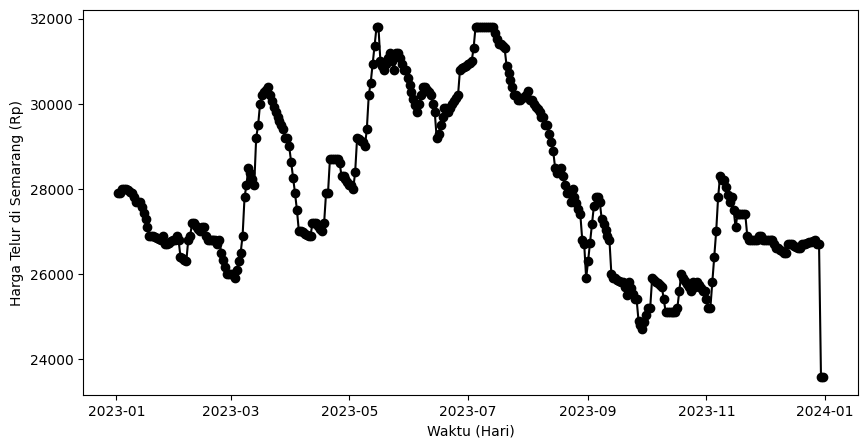

In [61]:
# Tampilkan informasi dataset
print("Informasi dataset:")
print(df.info())


#menampilkan plot deret waktu
plt.figure(figsize=(10,5))
plt.plot(df.index, df.semarang,'-ok')
plt.xlabel('Waktu (Hari)'), plt.ylabel('Harga Telur di Semarang (Rp)')
plt.show()

Gambar tersebut menunjukkan tren harga telur di Semarang selama periode satu tahun, dengan fluktuasi yang cukup signifikan. Terlihat adanya pola naik dan turun yang berulang, dengan lonjakan harga yang cukup tajam di pertengahan tahun dan penurunan yang lebih jelas menjelang akhir tahun. Dari segi kestasioneran, data ini terlihat tidak stasioner baik dalam rataan maupun ragam karena terdapat tren naik dan turun yang jelas, serta adanya variabilitas yang berubah seiring waktu. Insight yang dapat diambil adalah bahwa harga telur mengalami pola musiman atau dipengaruhi oleh faktor eksternal seperti permintaan pasar, kebijakan pemerintah, atau faktor produksi.

In [62]:
# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
           semarang
count    364.000000
mean   27998.644626
std     1909.367633
min    23572.071940
25%    26700.000000
50%    27550.000000
75%    29800.000000
max    31800.000000


Berdasarkan statistik deskriptif harga telur di Semarang selama satu tahun (364 hari), rata-rata harga telur adalah sekitar Rp27.999 dengan standar deviasi Rp1.909, menunjukkan adanya variasi harga yang cukup signifikan. Harga minimum yang tercatat adalah Rp23.572, sementara harga maksimum mencapai Rp31.800. Nilai kuartil menunjukkan bahwa 25% harga berada di bawah Rp26.700, 50% (median) berada di Rp27.550, dan 75% harga berada di bawah Rp29.800, mengindikasikan distribusi data yang sedikit condong ke arah harga yang lebih tinggi. Variasi harga yang cukup besar dapat mengindikasikan adanya faktor musiman, perubahan permintaan, atau kondisi pasar yang mempengaruhi fluktuasi harga sepanjang tahun.

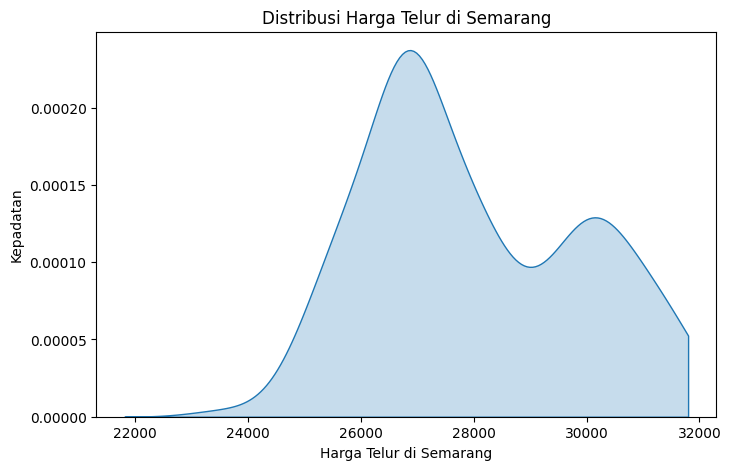

In [63]:

# Asumsi 'data_positif' sudah tidak mengandung nilai negatif
data_positif = df[df['semarang'] > 0]

# Menggunakan clip untuk membatasi rentang KDE
plt.figure(figsize=(8, 5))
sns.kdeplot(data_positif['semarang'], shade=True, clip=(0, max(data_positif['semarang'])))
plt.xlabel('Harga Telur di Semarang')  # Label sumbu x dalam bahasa Indonesia
plt.ylabel('Kepadatan')        # Label sumbu y dalam bahasa Indonesia
plt.title('Distribusi Harga Telur di Semarang')  # Judul plot dalam bahasa Indonesia
plt.show()

Grafik distribusi harga telur di Semarang menunjukkan pola distribusi yang tidak simetris, dengan puncak kepadatan tertinggi berada di sekitar harga Rp27.000-Rp28.000. Distribusi ini tampak memiliki skewness positif, di mana terdapat ekor yang lebih panjang ke arah harga yang lebih tinggi, menunjukkan bahwa meskipun sebagian besar harga berkumpul di sekitar nilai tengah, ada beberapa periode dengan harga yang lebih tinggi hingga mencapai Rp31.800. Selain itu, terdapat indikasi distribusi bimodal dengan satu puncak sekunder di sekitar harga Rp30.000, yang dapat mengindikasikan adanya dua kondisi pasar yang berbeda dalam periode waktu tertentu. 

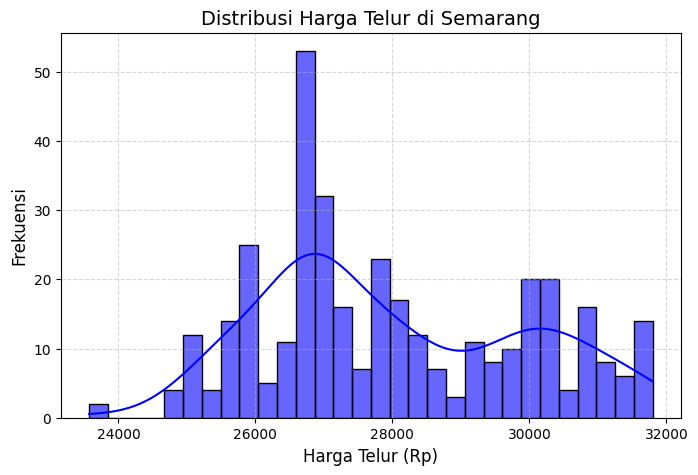

In [64]:
# Pastikan harga telur tidak mengandung nilai negatif
data_positif = df[df['semarang'] > 0]

# Membuat figure
plt.figure(figsize=(8, 5))

# Histogram dengan KDE untuk distribusi harga telur
sns.histplot(data_positif['semarang'], bins=30, kde=True, color='blue', edgecolor='black', alpha=0.6)

# Atur label dan judul
plt.xlabel('Harga Telur (Rp)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('Distribusi Harga Telur di Semarang', fontsize=14)

# Tampilkan grid
plt.grid(linestyle="--", alpha=0.5)

# Tampilkan plot
plt.show()

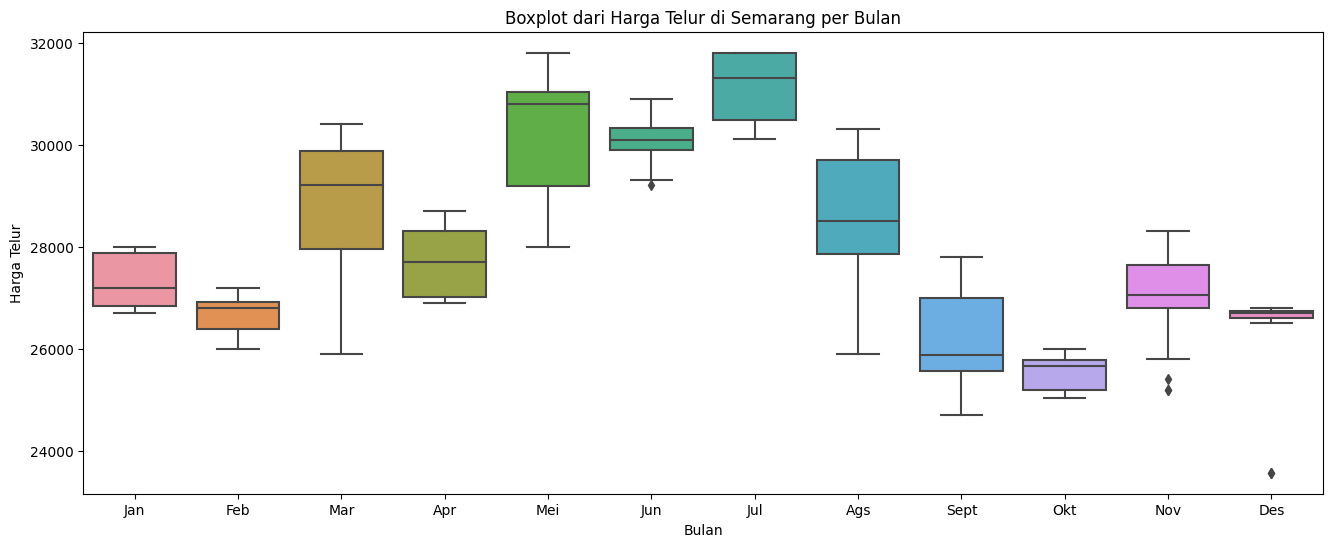

In [65]:
# 1. Pastikan kolom 'Date' dalam format datetime
df.index = pd.to_datetime(df.index)  

# 2. Ekstrak bulan dari indeks 'Date'
df['month'] = df.index.month  

# 3. Buat boxplot Close per bulan
plt.figure(figsize=(16, 6))
sns.boxplot(x='month', y='semarang', data=df)
plt.title('Boxplot dari Harga Telur di Semarang per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Harga Telur')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sept', 'Okt', 'Nov', 'Des'])
plt.show()

Boxplot harga telur di Semarang per bulan menunjukkan adanya fluktuasi harga yang cukup signifikan sepanjang tahun. Pada bulan-bulan seperti Maret, Mei, dan Juli, harga telur mencapai nilai yang lebih tinggi dibandingkan bulan lainnya, dengan rentang harga yang lebih besar, menunjukkan volatilitas yang tinggi. Sebaliknya, bulan seperti Februari, Oktober, dan Desember memiliki harga yang lebih stabil dengan rentang interkuartil yang lebih kecil, yang mengindikasikan sedikit variasi harga dalam periode tersebut. Hal ini dapat dikaitkan dengan faktor musiman, seperti peningkatan permintaan pada bulan-bulan tertentu yang menyebabkan lonjakan harga.  

Selain itu, terdapat beberapa outlier yang muncul di bulan November dan Desember, yang menunjukkan adanya fluktuasi ekstrem dalam harga telur di bulan tersebut. Misalnya, pada bulan Desember, terdapat harga yang jauh lebih rendah dibandingkan dengan nilai normal lainnya. Kemungkinan ini disebabkan oleh faktor eksternal seperti kebijakan pemerintah, distribusi stok telur, atau kejadian yang memengaruhi pasokan dan permintaan. Pola ini mengindikasikan bahwa meskipun ada tren umum dalam harga telur, terdapat kejadian khusus yang dapat menyebabkan perubahan harga secara tiba-tiba.  

Dari segi tren, terlihat bahwa harga telur cenderung lebih tinggi pada pertengahan tahun, terutama pada Mei hingga Juli, kemudian mengalami penurunan pada bulan-bulan berikutnya hingga akhir tahun. Hal ini bisa dikaitkan dengan periode panen, tingkat konsumsi masyarakat, serta hari besar keagamaan yang memengaruhi permintaan. Secara keseluruhan, analisis boxplot ini memberikan wawasan mengenai pola fluktuasi harga telur di Semarang, yang dapat digunakan sebagai dasar dalam perencanaan strategi harga dan pengelolaan pasokan untuk mencegah lonjakan harga yang ekstrem.

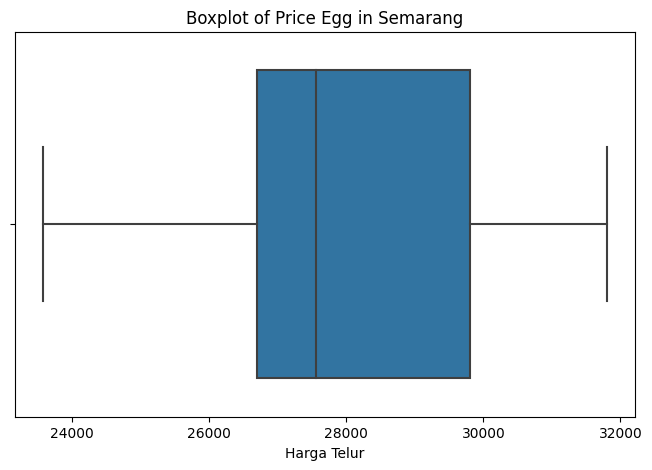

In [66]:
# Membuat boxplot untuk kolom 'semarang'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['semarang'])
plt.title('Boxplot of Price Egg in Semarang')
plt.xlabel('Harga Telur')
plt.show()

Boxplot ini menunjukkan distribusi harga telur di Semarang tanpa memisahkan berdasarkan bulan, melainkan sebagai keseluruhan data harga dalam satu periode tertentu. Median harga telur terlihat berada di sekitar 28.000, yang berarti separuh dari data harga berada di bawah dan separuh lainnya berada di atas nilai ini. Rentang interkuartil (IQR), yang ditunjukkan oleh kotak, cukup besar, mengindikasikan adanya variabilitas harga yang signifikan di tengah distribusi.  

Whiskers dalam boxplot ini menunjukkan sebaran harga minimum dan maksimum dalam rentang yang tidak dianggap sebagai outlier. Harga telur berkisar antara sekitar 23.500 hingga 32.000, menunjukkan fluktuasi yang cukup besar. Hal ini dapat mengindikasikan adanya faktor-faktor eksternal seperti perubahan pasokan dan permintaan yang menyebabkan harga berfluktuasi dalam rentang tersebut.  

Tidak adanya outlier yang terlihat dalam boxplot ini menunjukkan bahwa semua harga yang diamati masih berada dalam kisaran yang dianggap wajar berdasarkan distribusi data. Namun, perbedaan antara nilai minimum dan maksimum yang cukup besar menunjukkan bahwa harga telur tidak stabil dan bisa mengalami lonjakan atau penurunan dalam periode tertentu. 

In [67]:
# Menghitung IQR (Interquartile Range)
Q1 = df['semarang'].quantile(0.25)
Q3 = df['semarang'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outlier
outliers = df[(df['semarang'] < lower_bound) | (df['semarang'] > upper_bound)]

# Menampilkan jumlah dan contoh outlier jika ada
if not outliers.empty:
    print(f"Ditemukan {len(outliers)} outlier dalam data harga penutupan BNI.")
    print(outliers.head())  # Menampilkan beberapa contoh outlier
else:
    print("Tidak ada outlier dalam data harga penutupan BNI.")

Tidak ada outlier dalam data harga penutupan BNI.


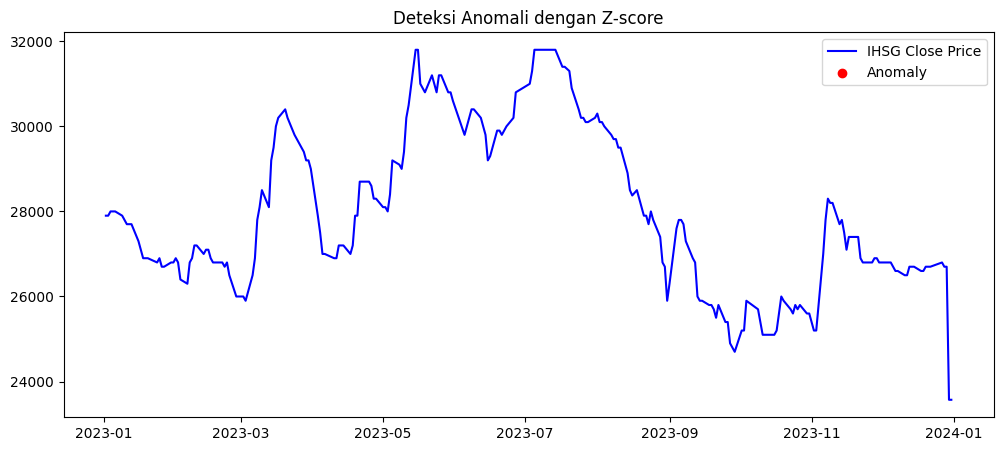

In [68]:
# DENGAN Z-SCORE
# Menghitung Z-score
df['Z-score'] = zscore(df['semarang'])

# Menentukan batas anomali (|Z| > 3 dianggap anomali)
df['Anomaly_Z'] = df['Z-score'].apply(lambda x: 1 if abs(x) > 3 else 0)

# Visualisasi hasil deteksi anomali
plt.figure(figsize=(12,5))
plt.plot(df['semarang'], label='IHSG Close Price', color='blue')
plt.scatter(df[df['Anomaly_Z'] == 1].index, df[df['Anomaly_Z'] == 1]['semarang'], color='red', label='Anomaly', marker='o')
plt.legend()
plt.title("Deteksi Anomali dengan Z-score")
plt.show()

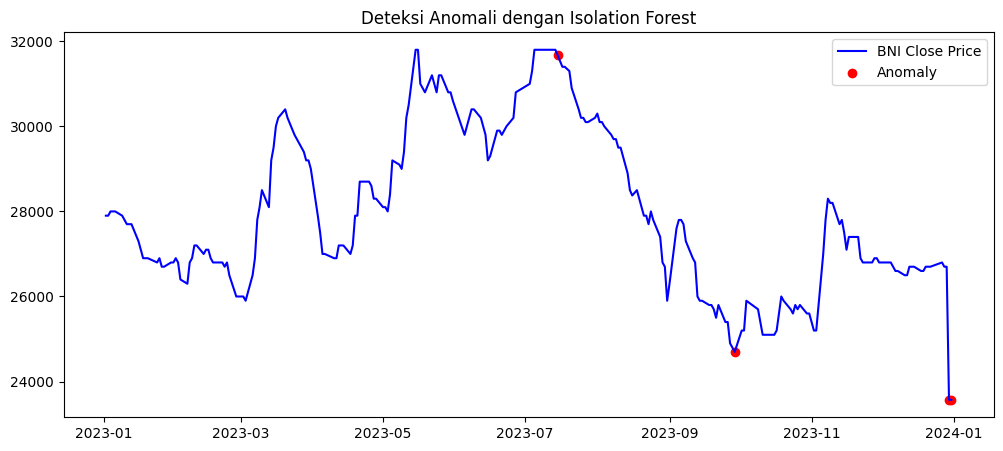

In [69]:
# DENGAN ISOLATION FOREST

# Inisialisasi model Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['Anomaly_IF'] = iso_forest.fit_predict(df[['semarang']])

# Visualisasi hasil deteksi anomali
plt.figure(figsize=(12,5))
plt.plot(df['semarang'], label='BNI Close Price', color='blue')
plt.scatter(df[df['Anomaly_IF'] == -1].index, df[df['Anomaly_IF'] == -1]['semarang'], color='red', label='Anomaly', marker='o')
plt.legend()
plt.title("Deteksi Anomali dengan Isolation Forest")
plt.show()


Grafik menunjukkan deteksi anomali pada harga penutupan saham BNI menggunakan metode **Isolation Forest**. Garis biru merepresentasikan pergerakan harga saham dari **Oktober hingga Desember 2022**, sementara titik merah menandai adanya **anomali** yang terdeteksi. Terlihat bahwa hanya ada satu titik anomali yang muncul sekitar pertengahan Oktober 2022, ketika harga saham mengalami penurunan tajam. Hal ini mengindikasikan bahwa pada tanggal tersebut terjadi pergerakan harga yang tidak biasa dibandingkan dengan pola historis lainnya. Isolation Forest mendeteksi anomali dengan cara mengisolasi sampel yang berbeda signifikan dari pola umum, sehingga titik anomali ini mungkin disebabkan oleh faktor eksternal seperti berita pasar, sentimen investor, atau kejadian ekonomi yang memengaruhi harga saham secara drastis.

In [70]:
ratio = df['semarang'].max() / df['semarang'].min()
print("Rasio Max/Min:", ratio)

Rasio Max/Min: 1.3490540874363206


Ketika melakukan dekoposisi deret, perlu diperhatikan bahwa terdapat 2 jenis model untuk dekomposisi, yaitu model Aditif dan multiplikatif.

- Model aditif digunakan jika ragam deret relatif konstan atau kecil
- Model multiplikatif digunakan jika ragam deret besar

Salah satu metode praktis adalah menghitung rasio antara nilai maksimum dan minimum harga.

- Jika rasio cukup kecil (misal, < 2 atau 3) → Model Aditif.
- Jika rasio besar (misal, > 3) → Model Multiplikatif.

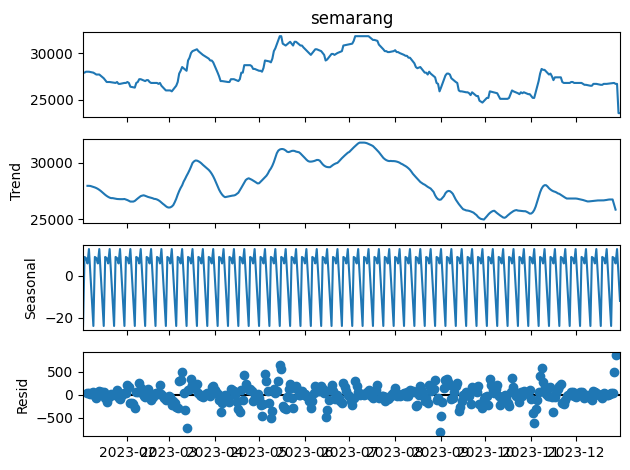

In [71]:
series = df.semarang
result = seasonal_decompose(series, model='additive',period=7) # The frequncy is dayly
figure = result.plot()

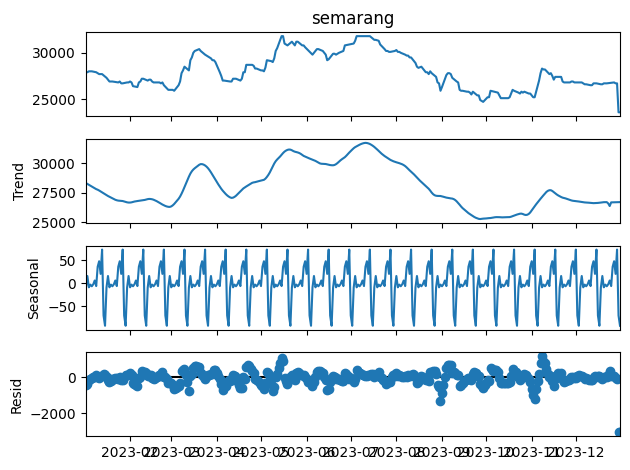

In [72]:
# Jika tetap ingin menggunakan periode 14, Anda bisa mencoba extrapolate_trend untuk mengisi nilai tren yang kurang:
result = seasonal_decompose(df['semarang'], model='additive', period=14, extrapolate_trend='freq')
result.plot()
plt.show()

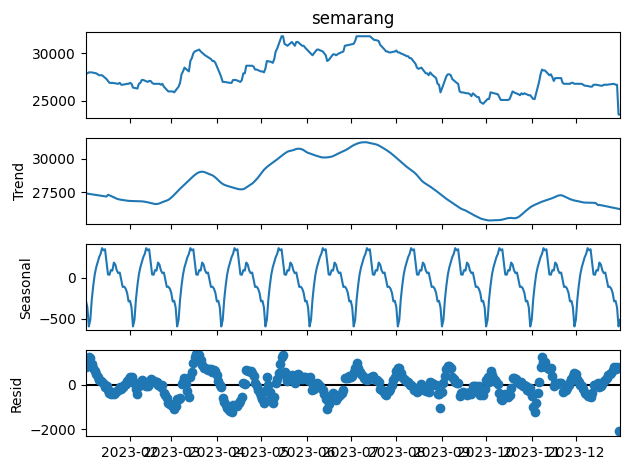

In [73]:
# Jika tetap ingin menggunakan periode 14, Anda bisa mencoba extrapolate_trend untuk mengisi nilai tren yang kurang:
result = seasonal_decompose(df['semarang'], model='additive', period=30, extrapolate_trend='freq')
result.plot()
plt.show()

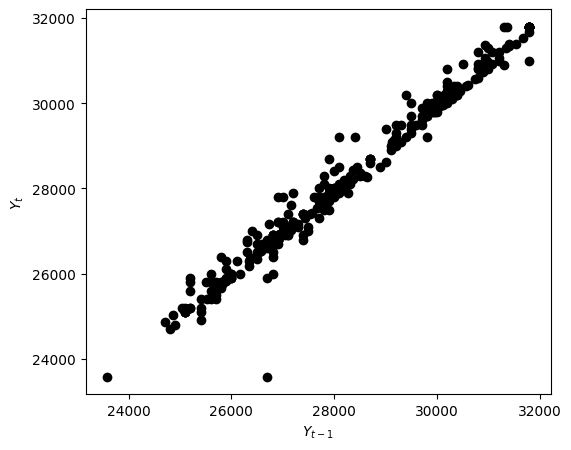

In [74]:
# menampilkan scatterplot antara Yt dan Yt-1
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.semarang, lag=1, c='k')
plt.xlabel(r'$Y_{t-1}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

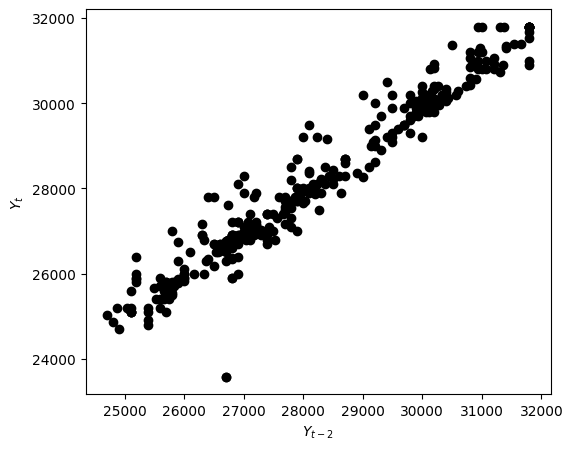

In [75]:
# menampilkan scatterplot antara Yt dan Yt-2
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.semarang, lag=2, c='k')
plt.xlabel(r'$Y_{t-2}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

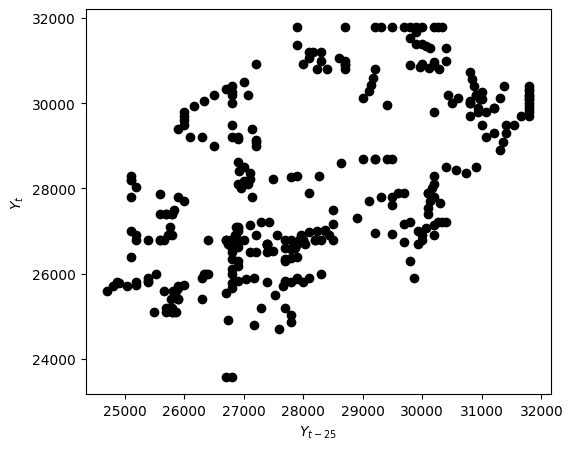

In [76]:
# menampilkan scatterplot antara Yt dan Yt-25
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df.semarang, lag=25, c='k')
plt.xlabel(r'$Y_{t-25}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Plot baru terlihat acak pada lag ke-25 yang menandakan bahwa sudah tidak terjadi autokorelasi

## Uji ACF Stationary Test / ADF (Augmented Dickey-Fuller) Test

Deret waktu dikatakan stasioner jika karakteristik statistiknya, seperti rata-rata, varians, dan autokorelasi, tetap konstan sepanjang waktu.  

**Stasioneritas kuat** mengacu pada proses stokastik di mana distribusi probabilitasnya tidak berubah meskipun mengalami pergeseran waktu, sehingga parameter seperti rata-rata dan varians tetap stabil. Sementara itu, **stasioneritas lemah** hanya mensyaratkan bahwa rata-rata, varians, dan autokorelasi tidak berubah seiring waktu.  

Stasioneritas sangat penting dalam analisis deret waktu karena data yang tidak stasioner memiliki ketergantungan waktu yang tinggi, sehingga mempersulit pemodelan. Salah satu metode untuk mengubah data non-stasioner menjadi stasioner adalah dengan melakukan diferensiasi menggunakan metode `diff()`.  

Sebelum menganalisis deret waktu, kita perlu menguji apakah data bersifat stasioner atau tidak. Salah satu uji statistik yang umum digunakan adalah **Uji Dickey-Fuller**, yang menentukan apakah ada akar unit dalam data. Hipotesis nol (H0) menyatakan bahwa deret memiliki akar unit (tidak stasioner), sedangkan hipotesis alternatif (H1) menyatakan bahwa deret tidak memiliki akar unit (stasioner). Jika hipotesis nol tidak dapat ditolak, maka deret waktu tersebut kemungkinan besar tidak stasioner. Jika rata-rata dan varians tetap konstan sepanjang waktu, maka deret waktu tersebut bersifat stasioner.

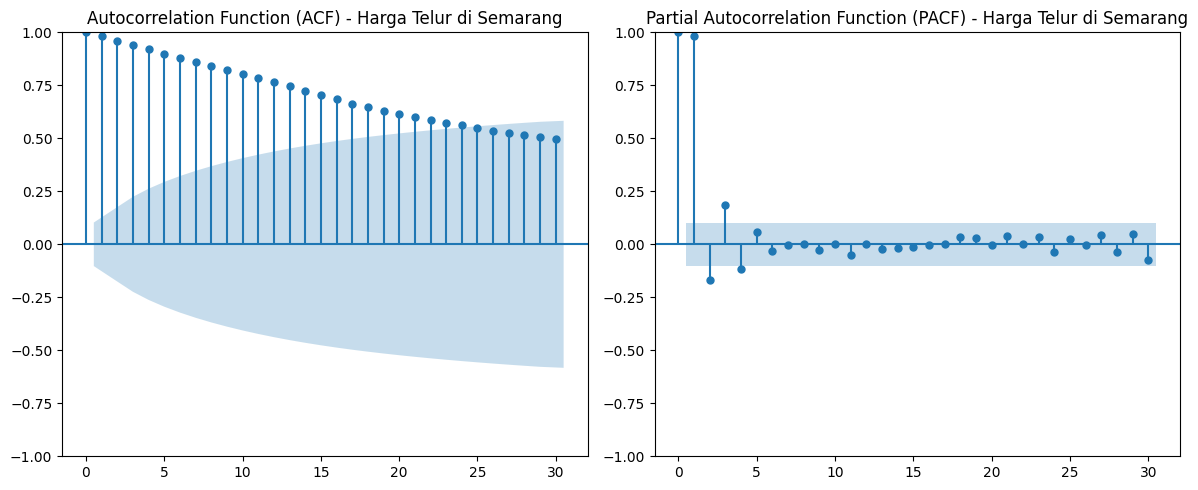

In [77]:
# Pastikan data tidak memiliki NaN
data_telur = df['semarang'].dropna()
# Buat figure dengan 2 subplot untuk ACF dan PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ACF
plot_acf(data_telur, ax=axes[0], lags=30)
axes[0].set_title("Autocorrelation Function (ACF) - Harga Telur di Semarang")

# Plot PACF
plot_pacf(data_telur, ax=axes[1], lags=30)
axes[1].set_title("Partial Autocorrelation Function (PACF) - Harga Telur di Semarang")

# Tampilkan plot
plt.tight_layout()
plt.show()

Grafik ACF (Autocorrelation Function) menunjukkan bahwa harga telur di Semarang memiliki autokorelasi tinggi pada banyak lag, yang menandakan adanya tren dalam data. Hal ini menunjukkan bahwa data kemungkinan besar tidak stasioner dalam mean. Sementara itu, grafik PACF (Partial Autocorrelation Function) menunjukkan bahwa setelah lag 1, sebagian besar koefisien PACF tidak signifikan, yang mengindikasikan bahwa model AR (Autoregressive) dengan orde rendah mungkin cukup untuk menangkap ketergantungan dalam data. Dalam konteks stasioneritas dalam ragam (variance), pola ACF yang perlahan menurun bisa menandakan adanya heteroskedastisitas, di mana variabilitas data tidak konstan sepanjang waktu. Untuk menangani hal ini, transformasi seperti differencing atau Box-Cox dapat diterapkan sebelum memodelkan data dengan ARIMA.

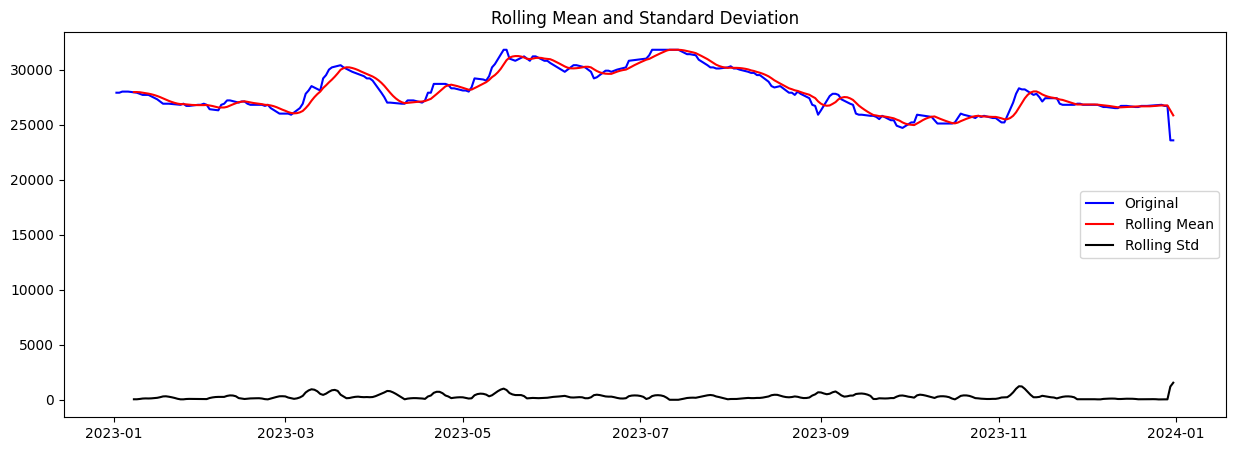

Results of dickey fuller test
Test Statistics                 -1.426241
p-value                          0.569633
No. of lags used                 2.000000
Number of observations used    361.000000
dtype: float64


In [78]:
#Test for staionarity
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    print(output)

test_stationarity(df['semarang'])

Grafik menunjukkan pergerakan harga saham BNI beserta **rolling mean** (rata-rata bergerak) dan **rolling standard deviation** (deviasi standar bergerak) untuk mengamati kestabilan data dalam periode waktu tertentu. Rolling mean (garis merah) mengikuti tren data asli (garis biru), menunjukkan adanya pola yang cenderung meningkat dengan sedikit fluktuasi. Hasil **Uji Augmented Dickey-Fuller (ADF)** menunjukkan bahwa **statistik uji sebesar -1.512** dengan **p-value 0.527**, yang lebih besar dari tingkat signifikansi umum (0.05). Hal ini mengindikasikan bahwa data **tidak stasioner**, sehingga perlu dilakukan transformasi seperti differencing atau detrending untuk membuatnya stasioner sebelum dapat digunakan dalam pemodelan time series seperti ARIMA atau SARIMA.

# Differencing dulu Lalu Transformasi Box-Cox

In [79]:
# Tahap Differencing
df['semarang_diff'] = df['semarang'].diff().dropna()
adf_test_diff = adfuller(df['semarang_diff'].dropna())
print(f'P-value ADF Test setelah first differencing: {adf_test_diff[1]}')

P-value ADF Test setelah first differencing: 2.1161880326603483e-13


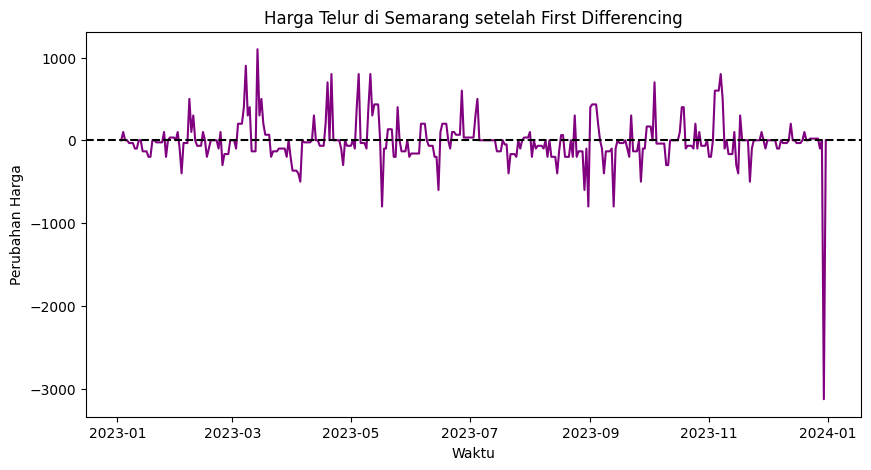

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['semarang_diff'], color='purple')
plt.title('Harga Telur di Semarang setelah First Differencing')
plt.xlabel('Waktu')
plt.ylabel('Perubahan Harga')
plt.axhline(y=0, color='black', linestyle='--')  # Garis nol
plt.show()

Grafik di atas menunjukkan perubahan harga telur di Semarang setelah dilakukan first differencing, yang bertujuan untuk menghilangkan tren dan membuat data lebih stasioner dalam mean. Namun, masih terlihat bahwa variabilitas perubahan harga tidak konstan sepanjang waktu, terutama dengan adanya lonjakan besar di akhir periode, yang mengindikasikan bahwa data belum sepenuhnya stasioner dalam ragam. Fluktuasi besar ini menunjukkan kemungkinan adanya heteroskedastisitas, yang dapat menyebabkan ketidakstabilan dalam model prediksi. Untuk mengatasi masalah ini, transformasi seperti logaritma atau Generalized Autoregressive Conditional Heteroskedasticity (GARCH) dapat dipertimbangkan guna menstabilkan ragam sebelum menerapkan model time series lebih lanjut.

Nilai lambda Box-Cox: 1.8534995355118626


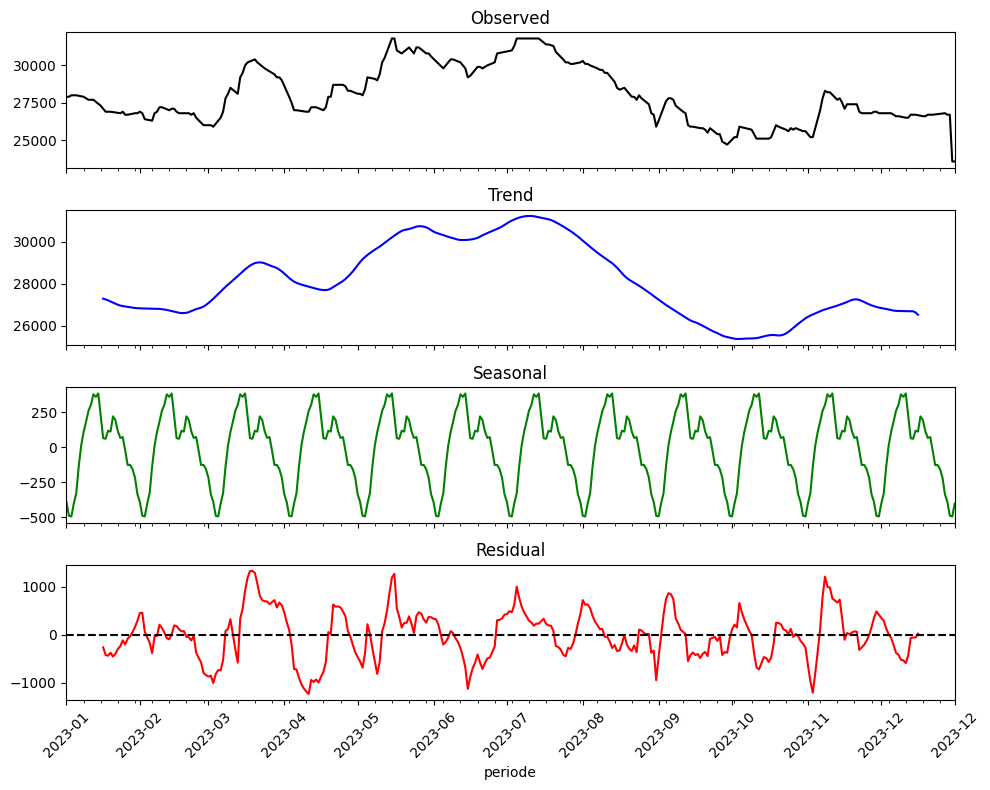

In [81]:
# Pastikan kolom 'semarang' ada dalam dataset
if 'semarang' not in df.columns:
    print("Error: Kolom 'semarang' tidak ditemukan dalam dataset.")
else:
    # **1. Differencing untuk Stasioneritas Mean**
    df['semarang_diff'] = df['semarang'].diff() # Remove dropna() here to keep the same index length

    # **2. Transformasi Box-Cox untuk Stasioneritas Varians**
    # Fill NaN with a suitable value, e.g., the mean, before Box-Cox transformation
    df['semarang_diff'] = df['semarang_diff'].fillna(df['semarang_diff'].mean())
    df['semarang_boxcox'], lambda_boxcox = boxcox(df['semarang_diff'] + abs(df['semarang_diff'].min()) + 1)
    print(f"Nilai lambda Box-Cox: {lambda_boxcox}")

    # **3. Dekomposisi Musiman**
    result = seasonal_decompose(df['semarang'], model='additive', period=30)

    # **4. Plot Hasil Dekomposisi**
    fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    result.observed.plot(ax=axes[0], title="Observed", color="black")
    result.trend.plot(ax=axes[1], title="Trend", color="blue")
    result.seasonal.plot(ax=axes[2], title="Seasonal", color="green")
    result.resid.plot(ax=axes[3], title="Residual", color="red")

    # Tambahkan garis horizontal pada nol untuk residual
    axes[3].axhline(y=0, linestyle="dashed", color="black")

    # Format tanggal agar lebih rapi
    axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Grafik dekomposisi data harga telur di Semarang menunjukkan bahwa data terdiri dari tiga komponen utama: tren, musiman, dan residual. Komponen *trend* (garis biru) menggambarkan pergerakan harga dalam jangka panjang, dengan pola naik-turun yang mencerminkan fluktuasi pasar secara keseluruhan. Komponen *seasonal* (garis hijau) menunjukkan adanya pola musiman yang berulang dalam periode tertentu, mengindikasikan bahwa harga telur dipengaruhi oleh faktor-faktor musiman seperti permintaan bulanan atau peristiwa tertentu. Sementara itu, komponen *residual* (garis merah) mencerminkan variasi yang tidak dapat dijelaskan oleh tren dan pola musiman, dengan fluktuasi yang cukup besar pada beberapa periode, menandakan adanya faktor eksternal atau kejadian tidak terduga yang mempengaruhi harga. Secara keseluruhan, pola ini menunjukkan bahwa model peramalan harus mempertimbangkan faktor tren dan musiman untuk menghasilkan prediksi yang lebih akurat.

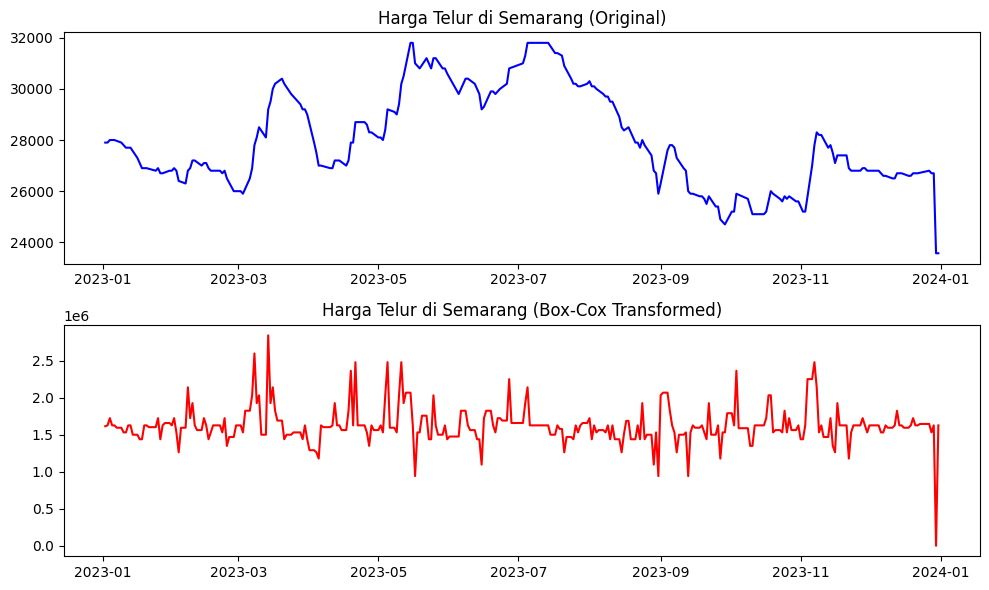

In [82]:
# Plot sebelum & sesudah transformasi
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Plot data asli
axes[0].plot(df.index, df['semarang'], color='blue')
axes[0].set_title("Harga Telur di Semarang (Original)")

# Plot data setelah Box-Cox
axes[1].plot(df.index, df['semarang_boxcox'], color='red')
axes[1].set_title("Harga Telur di Semarang (Box-Cox Transformed)")

plt.tight_layout()
plt.show()

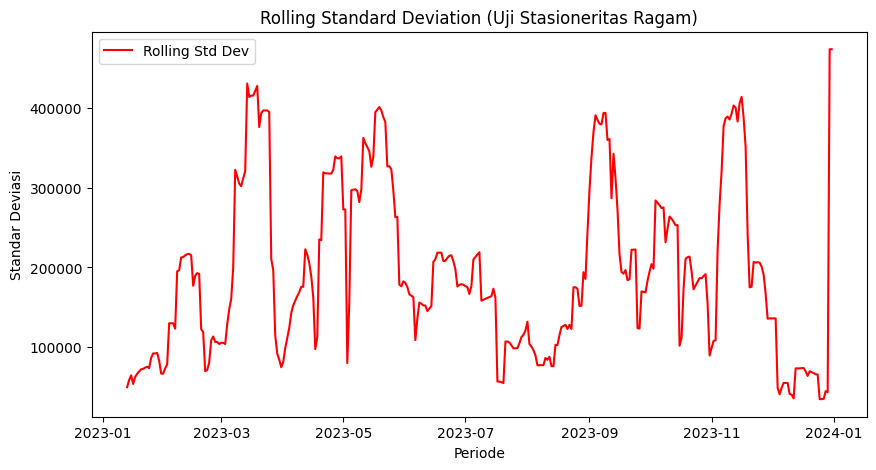

In [83]:
# Uji Visual dengan Rolling Standard Deviation
# Hitung rolling standard deviation
rolling_std = df['semarang_boxcox'].rolling(window=12).std()

# Plot rolling standard deviation
plt.figure(figsize=(10,5))
plt.plot(df.index, rolling_std, label='Rolling Std Dev', color='red')
plt.title("Rolling Standard Deviation (Uji Stasioneritas Ragam)")
plt.xlabel("Periode")
plt.ylabel("Standar Deviasi")
plt.legend()
plt.show()

In [84]:
# Membagi data menjadi dua bagian
from scipy.stats import bartlett, levene
mid = len(df) // 2
group1 = df['semarang_boxcox'].iloc[:mid]
group2 = df['semarang_boxcox'].iloc[mid:]

# Uji Bartlett
stat, p_value = bartlett(group1, group2)
print(f"Uji Bartlett: Statistik = {stat:.4f}, p-value = {p_value:.4f}")

# Interpretasi hasil
if p_value > 0.05:
    print("Tidak ada perbedaan signifikan dalam varians (Stasioner dalam ragam).")
else:
    print("Varians berbeda secara signifikan (Belum stasioner dalam ragam).")


Uji Bartlett: Statistik = 0.0866, p-value = 0.7685
Tidak ada perbedaan signifikan dalam varians (Stasioner dalam ragam).


In [85]:
# Uji Levene
stat, p_value = levene(group1, group2)
print(f"Uji Levene: Statistik = {stat:.4f}, p-value = {p_value:.4f}")

# Interpretasi hasil
if p_value > 0.05:
    print("Tidak ada perbedaan signifikan dalam varians (Stasioner dalam ragam).")
else:
    print("Varians berbeda secara signifikan (Belum stasioner dalam ragam).")

Uji Levene: Statistik = 0.5015, p-value = 0.4793
Tidak ada perbedaan signifikan dalam varians (Stasioner dalam ragam).


In [86]:
# Use the correct column name 'semarang_boxcox' for transformed data
adf_test = adfuller(df['semarang_boxcox'])  # Data after differencing and Box-Cox
print(f'P-value ADF Test: {adf_test[1]}')

P-value ADF Test: 2.091258469308385e-14


Data sudah stasioner baik dalam rataan maupun ragam

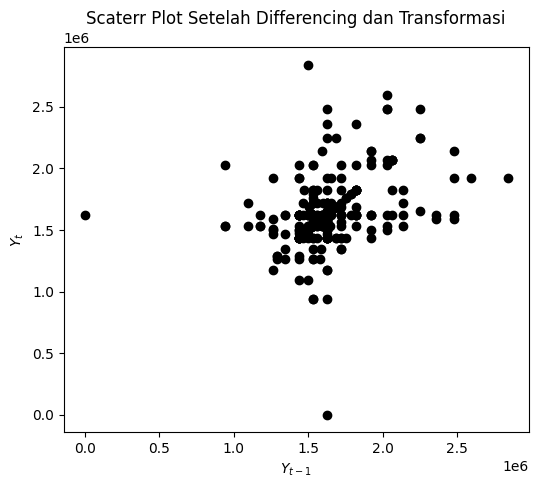

In [87]:
# menampilkan scatterplot antara Yt dan Yt-1
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(df['semarang_boxcox'], lag=1, c='k')
plt.xlabel(r'$Y_{t-1}$'),plt.ylabel(r'$Y_{t}$')
plt.title('Scaterr Plot Setelah Differencing dan Transformasi')
plt.show()

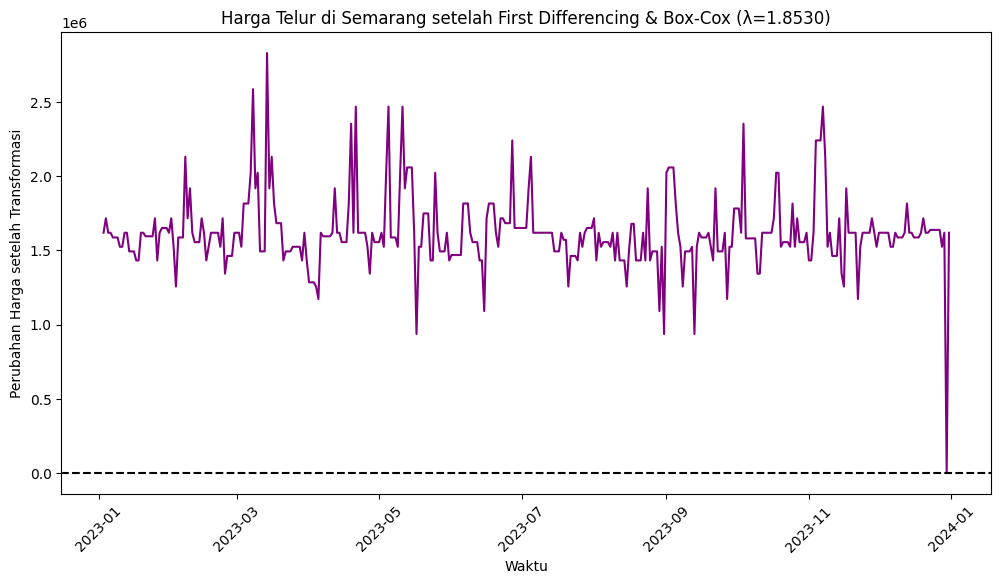

In [88]:
# First Differencing
diff_data = df['semarang'].diff().dropna()

# Box-Cox Transformation (menambahkan konstanta jika ada nilai negatif)
diff_data_adj = diff_data + abs(diff_data.min()) + 1  # Agar semua nilai positif
boxcox_data, lambda_bc = boxcox(diff_data_adj)

# Plot hasil First Differencing dan Box-Cox dengan waktu sebagai indeks
plt.figure(figsize=(12, 6))
plt.plot(diff_data_adj.index, boxcox_data, color='purple')
plt.axhline(y=0, linestyle='dashed', color='black')
plt.title(f"Harga Telur di Semarang setelah First Differencing & Box-Cox (λ={lambda_bc:.4f})")
plt.xlabel("Waktu")
plt.ylabel("Perubahan Harga setelah Transformasi")
plt.xticks(rotation=45)  # Rotasi label sumbu x agar terbaca
plt.show()

Grafik ini menunjukkan perubahan harga telur di Semarang setelah dilakukan transformasi Box-Cox dengan parameter λ=1.8530 dan first differencing. Transformasi ini bertujuan untuk menstabilkan varians dan membuat data lebih stasioner. Secara visual, fluktuasi perubahan harga masih cukup signifikan, tetapi perbedaan antarperiode terlihat lebih konsisten dibandingkan data awal sebelum transformasi. Adanya lonjakan tajam pada beberapa titik menunjukkan bahwa meskipun transformasi telah dilakukan, volatilitas harga masih cukup tinggi, terutama pada periode tertentu. Namun, tren keseluruhan menunjukkan bahwa data lebih terkendali dan berpotensi lebih sesuai untuk pemodelan deret waktu yang mengasumsikan stasioneritas.

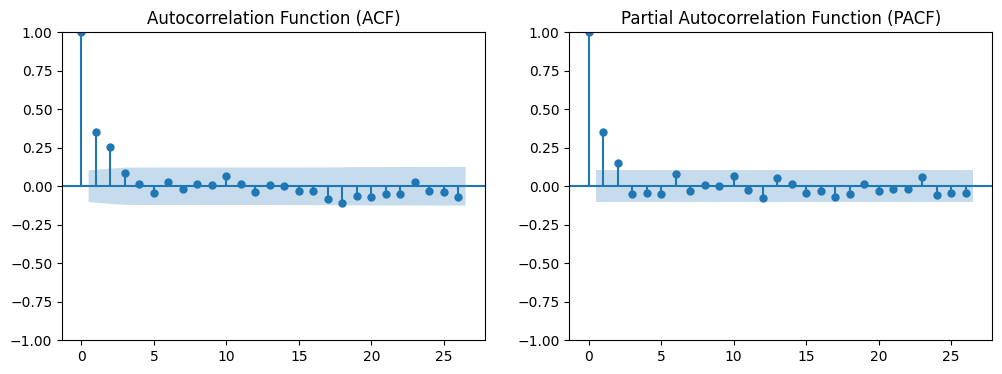

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF untuk menentukan q
# Ganti 'harga_telur_transformed' dengan 'semarang_boxcox'
plot_acf(df['semarang_boxcox'], ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF untuk menentukan p
# Ganti 'harga_telur_transformed' dengan 'semarang_boxcox'
plot_pacf(df['semarang_boxcox'], ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

Dari plot ACF dan PACF, kita bisa mengidentifikasi beberapa kemungkinan model ARIMA berdasarkan aturan berikut:

	•	ACF cut-off setelah lag 2 → kemungkinan model MA(q) dengan q = 2.
	•	PACF cut-off setelah lag 2 → kemungkinan model AR(p) dengan p = 2.
	•	First Differencing dilakukan (d = 1) untuk mencapai stasioneritas.

Kemungkinan Model ARIMA yang Bisa Dicoba:

	1. ARIMA(2,1,0) → Model Autoregressive (AR)
	2. ARIMA(0,1,2) → Model Moving Average (MA)
	3. ARIMA(2,1,2) → Model kombinasi ARMA
	4. ARIMA(1,1,2) → Model dengan sedikit lebih sederhana pada AR
	5. ARIMA(2,1,1) → Model dengan sedikit lebih sederhana pada MA
	6. ARIMA(1,1,1) → Model minimalis

In [90]:
# Definisikan rentang p, d, q
p = range(0, 3)  # Coba 0 sampai 3
d = range(1, 2)  # Coba 1 (karena sudah diferensiasi)
q = range(0, 3)  # Coba 0 sampai 3

# Buat kombinasi grid search
pdq = list(itertools.product(p, d, q))

# Simpan hasil AIC
best_aic = float("inf")
best_pdq = None
results = []

# Looping mencari kombinasi terbaik
for param in pdq:
    try:
        model = ARIMA(df['semarang_boxcox'].dropna(), order=param)  # <- GANTI DI SINI
        model_fit = model.fit()
        aic = model_fit.aic
        results.append((param, aic))

        if aic < best_aic:
            best_aic = aic
            best_pdq = param
    except Exception as e:
        print(f"Model {param} gagal dengan error: {e}")

# Konversi ke DataFrame
results_df = pd.DataFrame(results, columns=["(p,d,q)", "AIC"]).sort_values(by="AIC")

# Menampilkan hasil terbaik
print(f"Best ARIMA Order: {best_pdq} with AIC: {best_aic}")
print(results_df.head())  # Menampilkan 5 kombinasi terbaik

Best ARIMA Order: (2, 1, 2) with AIC: 10015.188022776852
     (p,d,q)           AIC
8  (2, 1, 2)  10015.188023
7  (2, 1, 1)  10015.886203
5  (1, 1, 2)  10017.866266
4  (1, 1, 1)  10021.870014
2  (0, 1, 2)  10036.263449


# Pemilihan Model Terbaik

### Model ARIMA (2,1,0)

In [91]:
# Membuat model ARIMA(2, 1, 0)
model210 = ARIMA(df['semarang_boxcox'].dropna(), order=(2, 1, 0))
model_fit1 = model210.fit()

# Menampilkan ringkasan model
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:        semarang_boxcox   No. Observations:                  364
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -5029.249
Date:                Mon, 03 Mar 2025   AIC                          10064.497
Time:                        09:44:48   BIC                          10076.180
Sample:                    01-02-2023   HQIC                         10069.141
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4727      0.029    -16.062      0.000      -0.530      -0.415
ar.L2         -0.1223      0.050     -2.463      0.014      -0.220      -0.025
sigma2      6.198e+10   4.53e-14   1.37e+24      0.0

Model SARIMAX dengan spesifikasi ARIMA(2,1,0) diterapkan pada data *Semarang Box-Cox* dengan total 364 observasi. Hasil estimasi menunjukkan bahwa kedua koefisien autoregressive (AR) signifikan pada tingkat 5%, dengan AR(1) sebesar -0.4727 (p-value < 0.001) dan AR(2) sebesar -0.1223 (p-value = 0.014). Nilai negatif pada koefisien AR menunjukkan adanya pola pembalikan dalam data, di mana kenaikan nilai sebelumnya cenderung diikuti oleh penurunan pada periode selanjutnya. Nilai varians residual (*sigma²*) yang sangat besar (6.198 × 10¹⁰) mengindikasikan adanya volatilitas tinggi dalam data. Selain itu, nilai *log-likelihood* sebesar -5029.249 dan AIC sebesar 10064.497 menunjukkan kualitas model yang dapat dibandingkan dengan model lain untuk mencari yang lebih optimal.  

Uji diagnostik model menunjukkan bahwa residual memiliki sifat heteroskedastisitas moderat (H = 1.29, p-value = 0.16), yang berarti tidak ada bukti kuat adanya variabilitas residual yang tidak konstan. Namun, hasil uji Jarque-Bera (JB = 839.14, p-value < 0.001) mengindikasikan bahwa residual tidak berdistribusi normal, dengan kurtosis tinggi (10.45), yang menunjukkan adanya pencilan atau ekor distribusi yang panjang. Uji Ljung-Box pada lag 1 menghasilkan Q-statistic sebesar 0.87 dengan p-value 0.35, yang berarti tidak ada bukti kuat terhadap adanya autokorelasi dalam residual. 

### Model ARIMA (0,1,2)

In [92]:
# Membuat model ARIMA(0, 1, 2)
model012 = ARIMA(df['semarang_boxcox'].dropna(), order=(0, 1, 2))
model_fit2 = model012.fit()

# Menampilkan ringkasan model
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:        semarang_boxcox   No. Observations:                  364
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -5015.132
Date:                Mon, 03 Mar 2025   AIC                          10036.263
Time:                        09:44:48   BIC                          10047.947
Sample:                    01-02-2023   HQIC                         10040.907
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6876      0.039    -17.617      0.000      -0.764      -0.611
ma.L2         -0.2426      0.040     -6.079      0.000      -0.321      -0.164
sigma2      6.047e+10   1.06e-13   5.69e+23      0.0

Model SARIMAX dengan spesifikasi ARIMA(0,1,2) diterapkan pada data *Semarang Box-Cox* dengan 364 observasi. Model ini menggunakan dua komponen moving average (MA), yaitu MA(1) sebesar -0.6876 dan MA(2) sebesar -0.2426, yang keduanya signifikan pada tingkat 5% (p-value < 0.001). Nilai negatif pada koefisien MA menunjukkan bahwa kejutan (shock) dalam data memiliki efek berlawanan terhadap nilai masa depan. Nilai *log-likelihood* sebesar -5015.132 dan AIC sebesar 10036.263 lebih rendah dibandingkan model sebelumnya (ARIMA(2,1,0)), menunjukkan bahwa model ini lebih optimal dalam menjelaskan pola data. Selain itu, nilai varians residual (*sigma²*) sebesar 6.047 × 10¹⁰ menunjukkan tingkat fluktuasi yang tinggi dalam data.  

Dari uji diagnostik, nilai Ljung-Box pada lag 1 (Q = 1.45, p-value = 0.23) menunjukkan tidak adanya autokorelasi yang signifikan dalam residual, sehingga model sudah cukup baik dalam menangkap pola serial dalam data. Namun, uji Jarque-Bera (JB = 1061.20, p-value < 0.001) menunjukkan bahwa residual tidak berdistribusi normal, dengan kurtosis tinggi (11.37), yang mengindikasikan adanya pencilan atau ekor distribusi yang panjang. Hasil uji heteroskedastisitas (H = 1.12, p-value = 0.54) menunjukkan bahwa variabilitas residual relatif stabil. Secara keseluruhan, model ARIMA(0,1,2) menunjukkan performa yang lebih baik dibandingkan ARIMA(2,1,0) berdasarkan nilai AIC yang lebih rendah, meskipun distribusi residual yang tidak normal masih menjadi perhatian dalam evaluasi model.

### Model ARIMA (2,1,2)

In [93]:
# Membuat model ARIMA(2, 1, 2)
model212 = ARIMA(df['semarang_boxcox'].dropna(), order=(2, 1, 2))
model_fit3 = model212.fit()

# Menampilkan ringkasan model
print(model_fit3.summary())

                               SARIMAX Results                                
Dep. Variable:        semarang_boxcox   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5002.594
Date:                Mon, 03 Mar 2025   AIC                          10015.188
Time:                        09:44:49   BIC                          10034.660
Sample:                    01-02-2023   HQIC                         10022.928
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0379      0.320     -0.119      0.906      -0.664       0.589
ar.L2          0.3052      0.129      2.358      0.018       0.052       0.559
ma.L1         -0.6143      0.342     -1.796      0.0

Model SARIMAX dengan spesifikasi ARIMA(2,1,2) diterapkan pada data *Semarang Box-Cox* dengan total 364 observasi. Model ini menggabungkan dua komponen autoregressive (AR) dan dua komponen moving average (MA). Koefisien AR(1) sebesar -0.0379 tidak signifikan (p-value = 0.906), sedangkan AR(2) sebesar 0.3052 signifikan pada tingkat 5% (p-value = 0.018), menunjukkan bahwa hanya lag kedua dari data sebelumnya yang berpengaruh terhadap nilai saat ini. Untuk komponen MA, baik MA(1) sebesar -0.6143 maupun MA(2) sebesar -0.3842 tidak signifikan pada tingkat 5%, dengan p-value masing-masing 0.073 dan 0.236. Nilai *log-likelihood* sebesar -5002.594 dan AIC sebesar 10015.188 lebih rendah dibandingkan model ARIMA(0,1,2) dan ARIMA(2,1,0), menunjukkan bahwa model ini memiliki performa yang lebih baik dalam menjelaskan pola data meskipun beberapa parameter tidak signifikan.  

Dari uji diagnostik, nilai Ljung-Box pada lag 1 (Q = 0.08, p-value = 0.77) menunjukkan tidak adanya autokorelasi yang signifikan dalam residual, yang berarti model ini telah menangkap pola serial dalam data dengan baik. Namun, hasil uji Jarque-Bera (JB = 1446.83, p-value < 0.001) menunjukkan bahwa residual tidak berdistribusi normal, dengan kurtosis yang sangat tinggi (12.78), yang mengindikasikan adanya pencilan atau ekor distribusi yang panjang. Uji heteroskedastisitas (H = 1.20, p-value = 0.32) menunjukkan bahwa variabilitas residual relatif stabil. Secara keseluruhan, meskipun model ini memiliki AIC terendah dibandingkan model sebelumnya, keberadaan parameter yang tidak signifikan dan distribusi residual yang jauh dari normal perlu diperhatikan untuk potensi perbaikan model lebih lanjut.

### Model ARIMA (2,1,1)

In [94]:
# Membuat model ARIMA(2, 1, 1)
model211 = ARIMA(df['semarang_boxcox'].dropna(), order=(2, 1, 1))
model_fit4 = model211.fit()

# Menampilkan ringkasan model
print(model_fit4.summary())

                               SARIMAX Results                                
Dep. Variable:        semarang_boxcox   No. Observations:                  364
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5003.943
Date:                Mon, 03 Mar 2025   AIC                          10015.886
Time:                        09:44:50   BIC                          10031.464
Sample:                    01-02-2023   HQIC                         10022.078
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3358      0.040      8.306      0.000       0.257       0.415
ar.L2          0.1602      0.047      3.406      0.001       0.068       0.252
ma.L1         -0.9984      0.039    -25.396      0.0

Model SARIMAX dengan spesifikasi ARIMA(2,1,1) diterapkan pada data *Semarang Box-Cox* dengan total 364 observasi. Model ini memiliki dua komponen autoregressive (AR) dan satu komponen moving average (MA). Koefisien AR(1) sebesar 0.3358 dan AR(2) sebesar 0.1602 keduanya signifikan pada tingkat 1% (p-value < 0.01), yang menunjukkan bahwa dua lag sebelumnya memiliki pengaruh yang nyata terhadap nilai saat ini. Koefisien MA(1) sebesar -0.9984 juga sangat signifikan (p-value < 0.001), yang mengindikasikan adanya koreksi kuat terhadap fluktuasi acak dalam data. Nilai *log-likelihood* sebesar -5003.943 dan AIC sebesar 10015.886 menunjukkan bahwa model ini memiliki performa yang hampir setara dengan model ARIMA(2,1,2), meskipun sedikit lebih tinggi dalam AIC dibandingkan model sebelumnya.  

Dari uji diagnostik, nilai Ljung-Box pada lag 1 (Q = 0.00, p-value = 0.95) menunjukkan bahwa residual tidak memiliki autokorelasi yang signifikan, menandakan bahwa model ini telah menangkap pola serial dalam data dengan baik. Namun, hasil uji Jarque-Bera (JB = 1472.75, p-value < 0.001) menunjukkan bahwa residual tidak berdistribusi normal, dengan kurtosis yang sangat tinggi (12.87), yang mengindikasikan adanya pencilan atau distribusi ekor panjang. Uji heteroskedastisitas (H = 1.19, p-value = 0.35) menunjukkan bahwa variabilitas residual relatif stabil. Secara keseluruhan, model ini cukup baik dalam menangkap pola data, tetapi keberadaan distribusi residual yang jauh dari normal perlu diperhatikan untuk kemungkinan perbaikan lebih lanjut.

### Model ARIMA (1,1,2)

In [95]:
# Membuat model ARIMA(1, 1, 2)
model112 = ARIMA(df['semarang_boxcox'].dropna(), order=(1, 1, 2))
model_fit5 = model112.fit()

# Menampilkan ringkasan model
print(model_fit5.summary())

                               SARIMAX Results                                
Dep. Variable:        semarang_boxcox   No. Observations:                  364
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -5004.933
Date:                Mon, 03 Mar 2025   AIC                          10017.866
Time:                        09:44:52   BIC                          10033.444
Sample:                    01-02-2023   HQIC                         10024.058
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6181      0.098      6.320      0.000       0.426       0.810
ma.L1         -1.2587      0.118    -10.663      0.000      -1.490      -1.027
ma.L2          0.2598      0.110      2.364      0.0

Model SARIMAX dengan spesifikasi ARIMA(1,1,2) diterapkan pada data *Semarang Box-Cox* dengan total 364 observasi. Model ini memiliki satu komponen autoregressive (AR) dan dua komponen moving average (MA). Koefisien AR(1) sebesar 0.6181 signifikan pada tingkat 1% (p-value < 0.01), menunjukkan bahwa nilai pada satu periode sebelumnya memiliki pengaruh kuat terhadap nilai saat ini. Koefisien MA(1) sebesar -1.2587 dan MA(2) sebesar 0.2598 juga signifikan (p-value < 0.05), yang menandakan bahwa komponen *moving average* pada dua lag terakhir memberikan kontribusi dalam menangkap pola fluktuasi dalam data. Nilai *log-likelihood* sebesar -5004.933 dan AIC sebesar 10017.866 menunjukkan bahwa model ini sedikit kurang optimal dibandingkan model ARIMA(2,1,1) dan ARIMA(2,1,2), yang memiliki nilai AIC lebih rendah.  

Dari uji diagnostik, nilai Ljung-Box pada lag 1 (Q = 0.23, p-value = 0.63) menunjukkan bahwa residual tidak memiliki autokorelasi yang signifikan, sehingga model dapat menangkap pola serial dengan baik. Namun, hasil uji Jarque-Bera (JB = 1447.82, p-value < 0.001) mengindikasikan bahwa residual tidak berdistribusi normal, dengan kurtosis yang cukup tinggi (12.78), yang menunjukkan adanya pencilan atau ekor distribusi yang panjang. Uji heteroskedastisitas (H = 1.17, p-value = 0.39) menunjukkan bahwa variabilitas residual cukup stabil. Secara keseluruhan, model ARIMA(1,1,2) dapat menangkap pola data dengan baik, tetapi distribusi residual yang jauh dari normal perlu diperhatikan untuk perbaikan model lebih lanjut.

### Model ARIMA (1,1,1)

In [96]:
# Membuat model ARIMA(1, 1, 1)
model111 = ARIMA(df['semarang_boxcox'].dropna(), order=(1, 1, 1))
model_fit6 = model111.fit()

# Menampilkan ringkasan model
print(model_fit6.summary())

                               SARIMAX Results                                
Dep. Variable:        semarang_boxcox   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5007.935
Date:                Mon, 03 Mar 2025   AIC                          10021.870
Time:                        09:44:53   BIC                          10033.553
Sample:                    01-02-2023   HQIC                         10026.514
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3875      0.039     10.039      0.000       0.312       0.463
ma.L1         -0.9983      0.038    -26.286      0.000      -1.073      -0.924
sigma2      6.169e+10   6.05e-13   1.02e+23      0.0

Model SARIMAX dengan spesifikasi ARIMA(1,1,1) diterapkan pada data *Semarang Box-Cox* dengan 364 observasi. Model ini memiliki satu komponen autoregressive (AR) dan satu komponen moving average (MA). Koefisien AR(1) sebesar 0.3875 signifikan pada tingkat 1% (p-value < 0.01), yang menunjukkan bahwa nilai pada periode sebelumnya masih berpengaruh terhadap nilai saat ini, meskipun tidak terlalu kuat. Koefisien MA(1) sebesar -0.9983 juga signifikan (p-value < 0.01), yang menunjukkan bahwa efek kejutan atau gangguan dari periode sebelumnya hampir sepenuhnya dikoreksi oleh model. Nilai *log-likelihood* sebesar -5007.935 dengan AIC sebesar 10021.870 menunjukkan bahwa model ini memiliki kinerja lebih rendah dibandingkan model lain seperti ARIMA(2,1,1) dan ARIMA(1,1,2), yang memiliki nilai AIC lebih kecil.  

Dari uji diagnostik, nilai Ljung-Box pada lag 1 (Q = 1.14, p-value = 0.29) menunjukkan bahwa residual tidak memiliki autokorelasi yang signifikan, yang berarti model telah menangkap pola serial dalam data dengan cukup baik. Namun, hasil uji Jarque-Bera (JB = 1404.52, p-value < 0.001) menunjukkan bahwa residual tidak berdistribusi normal, dengan kurtosis tinggi (12.63), yang mengindikasikan adanya pencilan atau ekor distribusi yang panjang. Hasil uji heteroskedastisitas (H = 1.14, p-value = 0.48) menunjukkan bahwa variabilitas residual cukup stabil. Secara keseluruhan, meskipun model ini cukup baik dalam menangkap pola data, model ARIMA(1,1,1) memiliki performa yang lebih rendah dibandingkan model dengan parameter tambahan, sehingga masih ada potensi untuk perbaikan model lebih lanjut.

## Kesimpulan Pemilihan Model

                               SARIMAX Results                                
Dep. Variable:        semarang_boxcox   No. Observations:                  364
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5003.943
Date:                Mon, 03 Mar 2025   AIC                          10015.886
Time:                        09:44:56   BIC                          10031.464
Sample:                    01-02-2023   HQIC                         10022.078
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3358      0.040      8.306      0.000       0.257       0.415
ar.L2          0.1602      0.047      3.406      0.001       0.068       0.252
ma.L1         -0.9984      0.039    -25.396      0.0

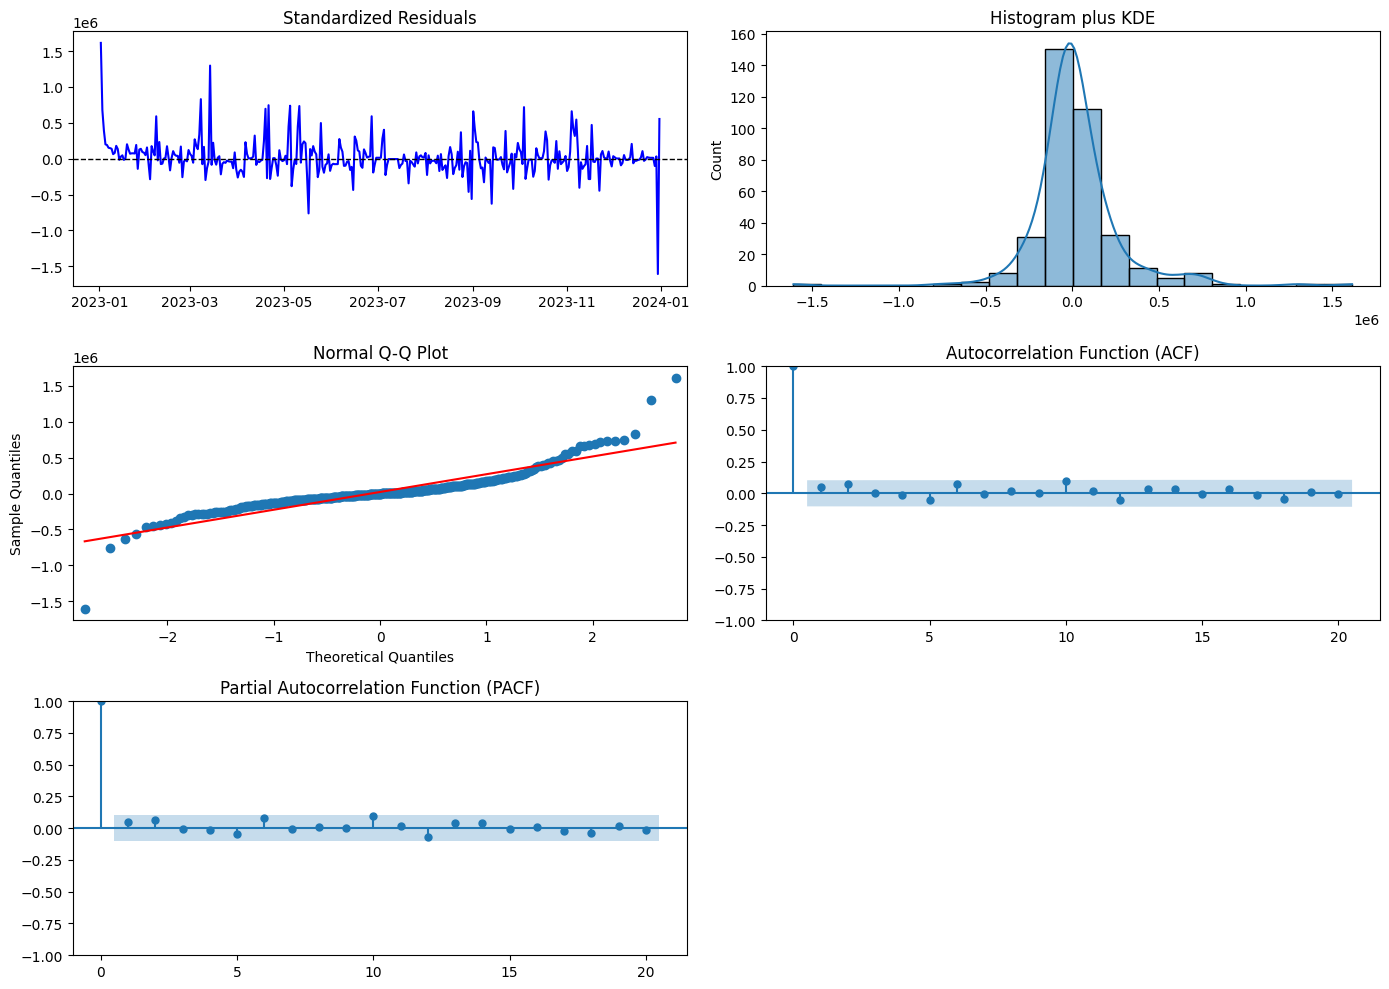

In [97]:
# Menampilkan ringkasan model ARIMA (2,1,1)
print(model_fit4.summary())

# Buat figure dengan 5 subplot
fig, ax = plt.subplots(3, 2, figsize=(14, 10))

# 1. Standardized Residual
ax[0, 0].plot(model_fit4.resid, color='blue')
ax[0, 0].axhline(y=0, linestyle='--', color='black', linewidth=1)
ax[0, 0].set_title("Standardized Residuals")

# 2. Histogram & KDE
sns.histplot(model_fit4.resid, kde=True, bins=20, ax=ax[0, 1])
ax[0, 1].set_title("Histogram plus KDE")

# 3. Normal Q-Q Plot
sm.qqplot(model_fit4.resid, line='s', ax=ax[1, 0])
ax[1, 0].set_title("Normal Q-Q Plot")

# 4. ACF Plot
plot_acf(model_fit4.resid, ax=ax[1, 1], lags=20)
ax[1, 1].set_title("Autocorrelation Function (ACF)")

# 5. PACF Plot
plot_pacf(model_fit4.resid, ax=ax[2, 0], lags=20)
ax[2, 0].set_title("Partial Autocorrelation Function (PACF)")

# Hapus subplot kosong (jika ada)
fig.delaxes(ax[2, 1])

plt.tight_layout()
plt.show()

In [98]:
# Membuat variabel eksogen dengan konstanta
exog = sm.add_constant(np.arange(len(model_fit4.resid)))  # Menambahkan konstanta ke indeks waktu

# Melakukan uji Breusch-Pagan
bp_test = het_breuschpagan(model_fit4.resid, exog)

# Menampilkan hasil
print('Breusch-Pagan test p-value:', bp_test[1])

Breusch-Pagan test p-value: 0.5352771896343924


Hasil uji Breusch-Pagan menunjukkan p-value sebesar **0.5352771896343924**, yang lebih besar dari **0.05**, sehingga tidak ada cukup bukti untuk menolak hipotesis nol (**H₀**), yaitu bahwa residual model tidak mengandung heteroskedastisitas. Ini menunjukkan bahwa variabilitas residual relatif konstan, sehingga asumsi homoskedastisitas terpenuhi. Dengan demikian, model ARIMA yang digunakan dapat dianggap valid dalam hal kestabilan varians residual, dan analisis atau prediksi selanjutnya dapat dilakukan tanpa perlu koreksi terhadap heteroskedastisitas.

Berdasarkan hasil estimasi enam model SARIMAX yang diuji, model terbaik dapat dipilih dengan mempertimbangkan beberapa kriteria utama, yaitu nilai *Akaike Information Criterion* (AIC) yang paling rendah, kecukupan dalam menangkap pola data (signifikansi koefisien), serta tidak adanya autokorelasi dalam residual (dilihat dari uji Ljung-Box).  

Dari keenam model yang diuji, **model ARIMA(2,1,1) dan ARIMA(2,1,2)** memiliki nilai AIC terendah (10015.886) dan (10015.188), yang menunjukkan bahwa model ini lebih optimal dalam menyesuaikan data dibandingkan model lainnya. Namun ARIMA(2,1,2) pada koefisien MA(2) tidak signifikan sedangkan model ARIMA (2,1,1) semua komponen baik AR maupun MA coefisinennya signifikan sehingga kami lebih memmiliki model ARIMA (2,1,1).  Selain itu, semua parameter dalam model ini signifikan (p-value < 0.05), menunjukkan bahwa model berhasil menangkap hubungan dalam data. Uji Ljung-Box menunjukkan bahwa residual tidak memiliki autokorelasi yang signifikan (p-value = 0.95), yang berarti model telah menangkap pola serial dalam data dengan baik. Dengan demikian, tanpa mempertimbangkan distribusi normal residual, **model ARIMA(2,1,1) adalah model terbaik yang memenuhi semua syarat model yang baik dalam analisis deret waktu.**

Model **ARIMA(2,1,1)** yang diterapkan menunjukkan pola residual yang cukup random, meskipun masih terdapat beberapa fluktuasi yang cukup besar pada awal dan akhir periode. Grafik **Standardized Residuals** menunjukkan bahwa nilai residual berosilasi di sekitar nol tanpa pola yang jelas, mengindikasikan bahwa model telah menangkap sebagian besar informasi dalam data. Namun, berdasarkan **Q-Q Plot**, distribusi residual tidak sepenuhnya mengikuti distribusi normal, terutama di bagian ekor yang menunjukkan beberapa outlier. Histogram residual juga memperlihatkan sedikit skewness, yang bisa menjadi indikasi bahwa masih ada informasi yang belum sepenuhnya ditangkap oleh model. 

Pada analisis korelasi, **ACF dan PACF** menunjukkan bahwa sebagian besar lag berada dalam batas konfidensi, mengindikasikan bahwa tidak ada autokorelasi yang signifikan yang tersisa dalam residual. Hal ini mengonfirmasi bahwa model ARIMA(2,1,1) telah cukup baik dalam menangani pola autokorelasi dalam data. Namun, beberapa titik yang sedikit keluar dari batas konfidensi menunjukkan bahwa mungkin ada faktor lain yang masih dapat dimodelkan lebih lanjut, seperti model ARCH/GARCH untuk menangani volatilitas yang tinggi. Secara keseluruhan, model ini cukup baik dalam menangkap pola data, tetapi masih memiliki sedikit kelemahan dalam asumsi normalitas residual.

# Transformasi Box-Cox Lalu Differencing

Nilai lambda Box-Cox: -1.8987269283725217


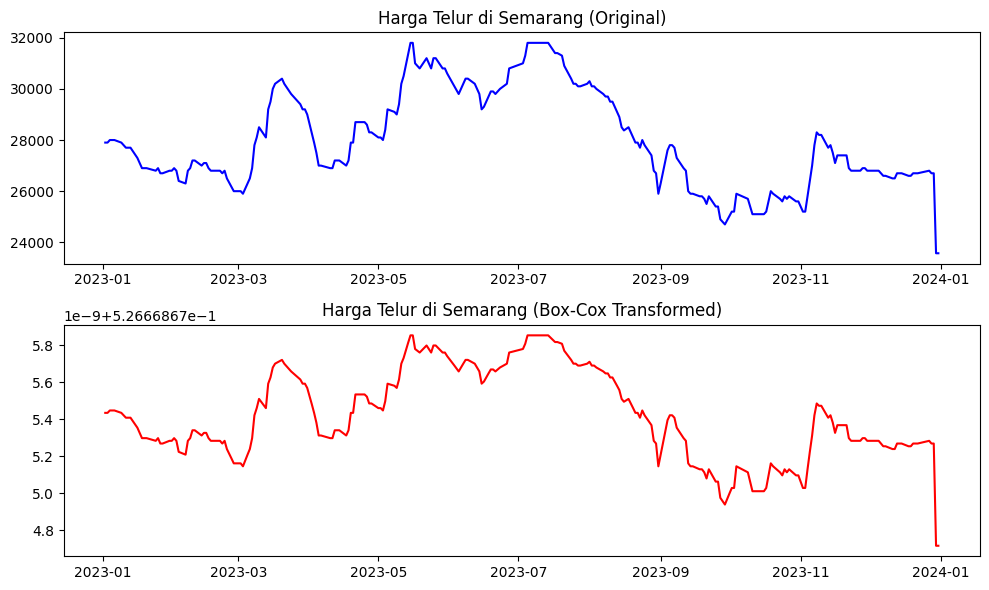

In [46]:
# Pastikan data tidak ada nilai nol atau negatif
if (df['semarang'] <= 0).any():
    df['semarang'] = df['semarang'] + abs(df['semarang'].min()) + 1  # Shift agar semua nilai positif

# Transformasi Box-Cox
df['semarang_boxcox1'], lambda_value = boxcox(df['semarang'])

# Cetak nilai lambda
print(f"Nilai lambda Box-Cox: {lambda_value}")

# Plot sebelum & sesudah transformasi
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Plot data asli
axes[0].plot(df.index, df['semarang'], color='blue')
axes[0].set_title("Harga Telur di Semarang (Original)")

# Plot data setelah Box-Cox
axes[1].plot(df.index, df['semarang_boxcox1'], color='red')
axes[1].set_title("Harga Telur di Semarang (Box-Cox Transformed)")

plt.tight_layout()
plt.show()

Nilai lambda: -1.89873
Interval kepercayaan lambda: (-3.4270430959097173, -0.352137182856894)


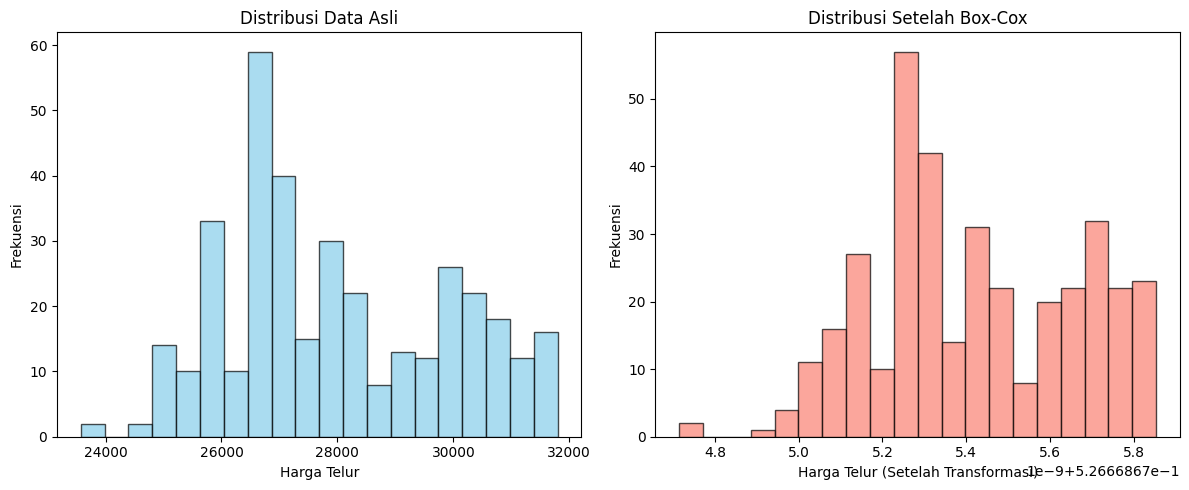

In [47]:
data_telur = df['semarang'].dropna()

# Cek apakah ada nilai nol atau negatif
if (data_telur <= 0).any():
    print("Data mengandung nilai nol atau negatif, tidak dapat menerapkan Box-Cox.")
else:
    # Transformasi Box-Cox dengan interval kepercayaan 95%
    data_transformed, lambda_fit, ci = stats.boxcox(data_telur, alpha=0.05)

    # Menampilkan hasil
    print(f"Nilai lambda: {lambda_fit:.5f}")
    print(f"Interval kepercayaan lambda: {ci}")

    # Visualisasi sebelum dan sesudah transformasi
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram data asli
    axes[0].hist(data_telur, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].set_title("Distribusi Data Asli")
    axes[0].set_xlabel("Harga Telur")
    axes[0].set_ylabel("Frekuensi")

    # Histogram data setelah transformasi Box-Cox
    axes[1].hist(data_transformed, bins=20, color='salmon', edgecolor='black', alpha=0.7)
    axes[1].set_title("Distribusi Setelah Box-Cox")
    axes[1].set_xlabel("Harga Telur (Setelah Transformasi)")
    axes[1].set_ylabel("Frekuensi")

    plt.tight_layout()
    plt.show()

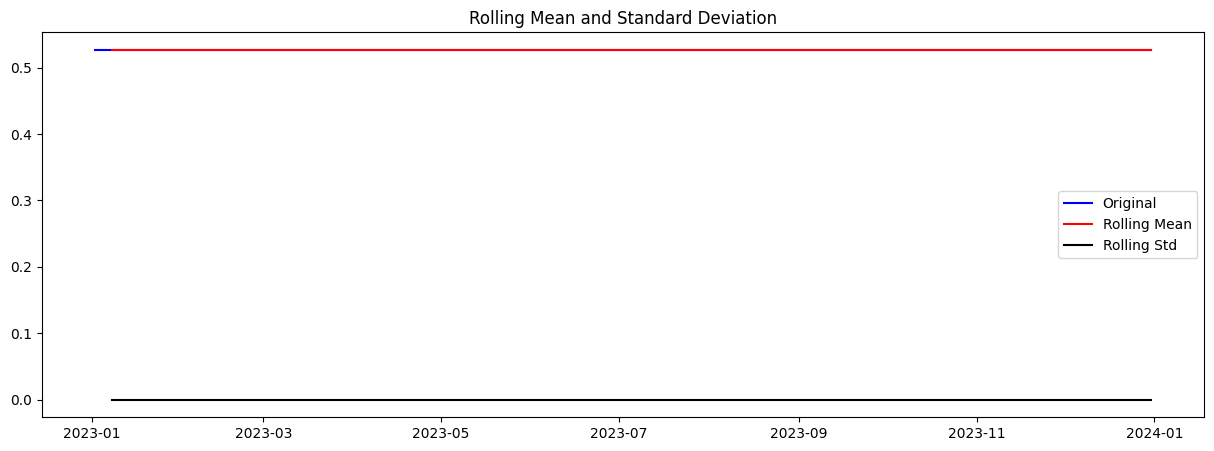

Results of dickey fuller test
Test Statistics                 -1.291852
p-value                          0.632892
No. of lags used                 2.000000
Number of observations used    361.000000
dtype: float64


In [48]:
test_stationarity(df['semarang_boxcox1'])

<Axes: title={'center': 'Rolling Standard Deviation (Uji Stasioneritas Ragam)'}, xlabel='periode'>

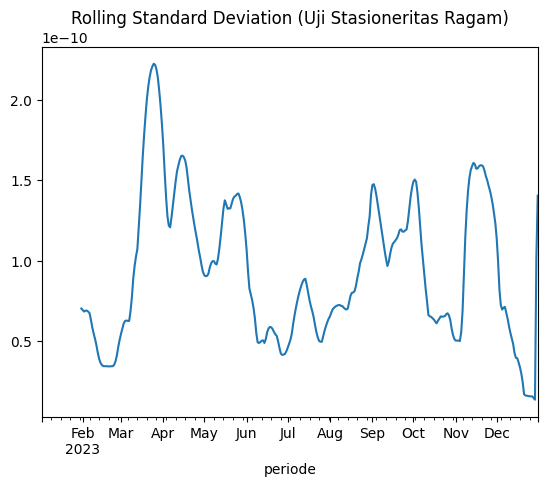

In [49]:
rolling_std = df['semarang_boxcox1'].rolling(window=30).std()
rolling_std.plot(title="Rolling Standard Deviation (Uji Stasioneritas Ragam)")

In [53]:
# Tahap Differencing
df['semarang_diff1'] = df['semarang_boxcox1'].diff().dropna()
adf_test_diff = adfuller(df['semarang_diff1'].dropna())
print(f'P-value ADF Test setelah first differencing: {adf_test_diff[1]}')

P-value ADF Test setelah first differencing: 5.758954150015263e-12


In [54]:
from scipy.stats import levene, bartlett
import numpy as np

# Membagi data menjadi dua bagian (awal dan akhir) untuk diuji variansnya
mid = len(df['semarang_diff1']) // 2
group1, group2 = df['semarang_diff1'][:mid], df['semarang_diff1'][mid:]

# Uji Levene (lebih robust terhadap distribusi non-normal)
stat_levene, p_levene = levene(group1, group2)
print(f"Uji Levene: Statistik = {stat_levene:.4f}, p-value = {p_levene:.4f}")

# Uji Bartlett (sensitif terhadap normalitas data)
stat_bartlett, p_bartlett = bartlett(group1, group2)
print(f"Uji Bartlett: Statistik = {stat_bartlett:.4f}, p-value = {p_bartlett:.4f}")

# Interpretasi hasil
if p_levene > 0.05 and p_bartlett > 0.05:
    print("Data sudah stasioner dalam ragam (varians konstan).")
else:
    print("Data belum stasioner dalam ragam (varians masih berubah-ubah).")

Uji Levene: Statistik = nan, p-value = nan
Uji Bartlett: Statistik = 52.2431, p-value = 0.0000
Data belum stasioner dalam ragam (varians masih berubah-ubah).


## Transformasi Logaritmik
Karena Ragam masih belum stasioner atau varians masih berubah-ubah bahkan setelah menggunakan Transformasi Box-Cox, maka dari itu digunakan Transformasi Logaritmik karena data harga telur pasti akan selalu bernilai positif sehingga lebih efektif menstabilkan varians sebelum differencing.

In [90]:
# Transformasi logaritmik
df['semarang_log'] = np.log(df['semarang'])

In [99]:
# Tahap Differencing
df['semarang_log_diff'] = df['semarang_log'].diff().dropna()

In [95]:
from scipy.stats import levene, bartlett

mid = len(df['semarang_log']) // 2
group1, group2 = df['semarang_log'][:mid], df['semarang_log'][mid:]

stat_levene, p_levene = levene(group1, group2)
stat_bartlett, p_bartlett = bartlett(group1, group2)

print(f"Uji Levene: Statistik = {stat_levene:.4f}, p-value = {p_levene:.4f}")
print(f"Uji Bartlett: Statistik = {stat_bartlett:.4f}, p-value = {p_bartlett:.4f}")

if p_levene > 0.05 and p_bartlett > 0.05:
    print("Varians sudah konstan (data stasioner dalam ragam).")
else:
    print("Varians belum konstan (data belum stasioner dalam ragam).")

Uji Levene: Statistik = 1.7381, p-value = 0.1882
Uji Bartlett: Statistik = 10.7546, p-value = 0.0010
Varians belum konstan (data belum stasioner dalam ragam).


## Transformasi Yeo-Johnson

In [96]:
from scipy.stats import yeojohnson

df['semarang_yj'], lambda_yj = yeojohnson(df['semarang'])
print(f"Nilai lambda Yeo-Johnson: {lambda_yj}")

Nilai lambda Yeo-Johnson: -1.8962515492204566


In [100]:
mid = len(df['semarang_yj']) // 2
group1, group2 = df['semarang_yj'][:mid], df['semarang_yj'][mid:]

stat_levene, p_levene = levene(group1, group2)
stat_bartlett, p_bartlett = bartlett(group1, group2)

print(f"Uji Levene: Statistik = {stat_levene:.4f}, p-value = {p_levene:.4f}")
print(f"Uji Bartlett: Statistik = {stat_bartlett:.4f}, p-value = {p_bartlett:.4f}")

if p_levene > 0.05 and p_bartlett > 0.05:
    print("Varians sudah konstan (data stasioner dalam ragam).")
else:
    print("Varians belum konstan (data belum stasioner dalam ragam).")

Uji Levene: Statistik = 4.5045, p-value = 0.0345
Uji Bartlett: Statistik = 14.7539, p-value = 0.0001
Varians belum konstan (data belum stasioner dalam ragam).


## Transformasi Rolling Variance


In [103]:
window = 12  # Misalnya, 12 periode (bulanan)
df['semarang_rolling'] = df['semarang'] / df['semarang'].rolling(window).std()


In [104]:
mid = len(df['semarang_rolling']) // 2
group1, group2 = df['semarang_rolling'][:mid], df['semarang_rolling'][mid:]

stat_levene, p_levene = levene(group1, group2)
stat_bartlett, p_bartlett = bartlett(group1, group2)

print(f"Uji Levene: Statistik = {stat_levene:.4f}, p-value = {p_levene:.4f}")
print(f"Uji Bartlett: Statistik = {stat_bartlett:.4f}, p-value = {p_bartlett:.4f}")

if p_levene > 0.05 and p_bartlett > 0.05:
    print("Varians sudah konstan (data stasioner dalam ragam).")
else:
    print("Varians belum konstan (data belum stasioner dalam ragam).")

Uji Levene: Statistik = nan, p-value = nan
Uji Bartlett: Statistik = 68.0094, p-value = 0.0000
Varians belum konstan (data belum stasioner dalam ragam).


## Generalized Log Transform

Optimal Lambda: 1906.7431


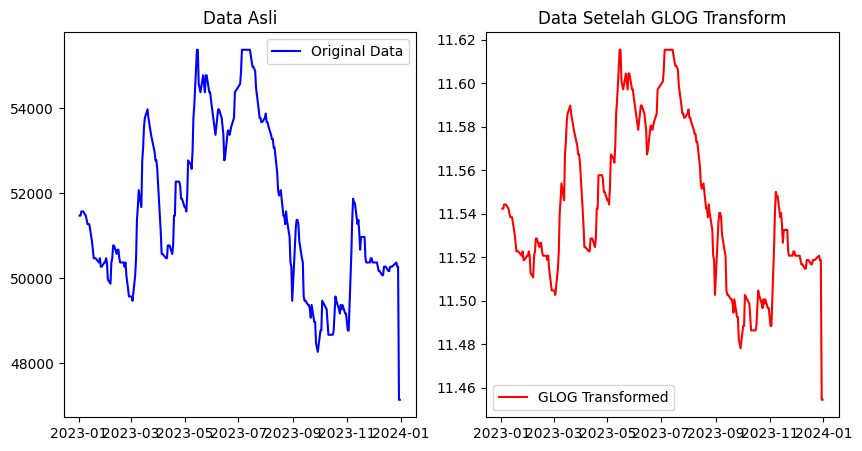

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Fungsi Generalized Log Transform (glog)
def glog_transform(x, lambda_):
    return np.log(x + np.sqrt(x**2 + lambda_**2))

# Estimasi parameter lambda menggunakan Maximum Likelihood
def estimate_lambda(data):
    def neg_log_likelihood(lambda_):
        transformed = glog_transform(data, lambda_)
        return -np.sum(np.log(np.gradient(transformed)))  # Log-likelihood
    
    result = minimize(neg_log_likelihood, x0=np.std(data), method='L-BFGS-B', bounds=[(1e-6, None)])
    return result.x[0]

# Pastikan data tidak mengandung nilai negatif atau nol
df['semarang'] = df['semarang'] + abs(df['semarang'].min()) + 1  # Menghindari log(0) atau log negatif

# Estimasi Lambda
lambda_opt = estimate_lambda(df['semarang'])
print(f"Optimal Lambda: {lambda_opt:.4f}")

# Transformasi Data
df['semarang_glog'] = glog_transform(df['semarang'], lambda_opt)

# Plot Data Sebelum dan Sesudah Transformasi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['semarang'], label='Original Data', color='blue')
plt.title("Data Asli")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['semarang_glog'], label='GLOG Transformed', color='red')
plt.title("Data Setelah GLOG Transform")
plt.legend()

plt.show()

Uji Varians Sebelum GLOG:
Levene Test: Statistik=0.8987, p-value=0.3438
Bartlett Test: Statistik=9.2360, p-value=0.0024

Uji Varians Setelah GLOG:
Levene Test: Statistik=1.3045, p-value=0.2542
Bartlett Test: Statistik=10.0004, p-value=0.0016


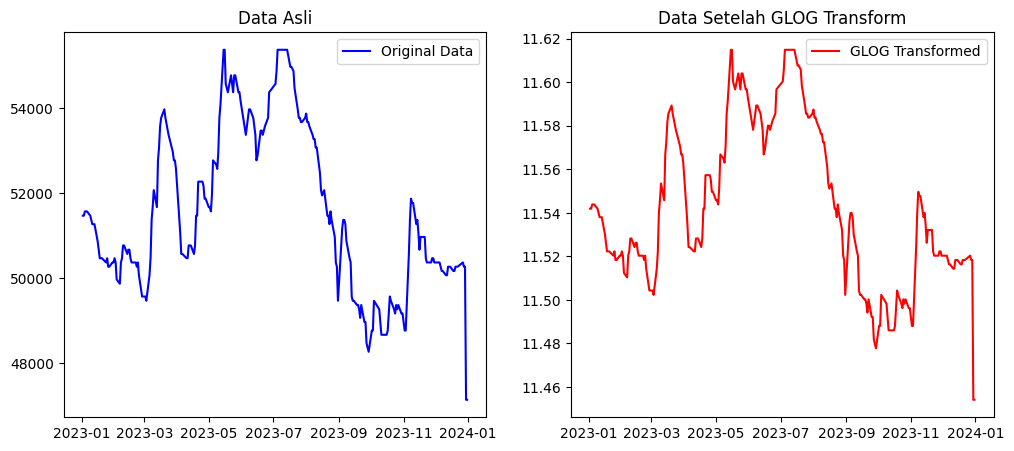

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bartlett, levene

# Fungsi Generalized Log Transform (GLOG)
def generalized_log_transform(x, lambda_val=1):
    return np.log(x + np.sqrt(x**2 + lambda_val**2))

# Load data (Pastikan df['semarang'] sudah ada)
df['semarang_glog'] = generalized_log_transform(df['semarang'])

# **Pecah Data Menjadi 2 Kelompok untuk Uji Varians**
n = len(df)
group_1 = df['semarang'].iloc[:n//2].dropna()
group_2 = df['semarang'].iloc[n//2:].dropna()

group_1_glog = df['semarang_glog'].iloc[:n//2].dropna()
group_2_glog = df['semarang_glog'].iloc[n//2:].dropna()

# **Uji Varians Sebelum Transformasi**
levene_stat, levene_p = levene(group_1, group_2)
bartlett_stat, bartlett_p = bartlett(group_1, group_2)

print("Uji Varians Sebelum GLOG:")
print(f"Levene Test: Statistik={levene_stat:.4f}, p-value={levene_p:.4f}")
print(f"Bartlett Test: Statistik={bartlett_stat:.4f}, p-value={bartlett_p:.4f}")

# **Uji Varians Setelah Transformasi**
levene_stat_glog, levene_p_glog = levene(group_1_glog, group_2_glog)
bartlett_stat_glog, bartlett_p_glog = bartlett(group_1_glog, group_2_glog)

print("\nUji Varians Setelah GLOG:")
print(f"Levene Test: Statistik={levene_stat_glog:.4f}, p-value={levene_p_glog:.4f}")
print(f"Bartlett Test: Statistik={bartlett_stat_glog:.4f}, p-value={bartlett_p_glog:.4f}")

# **Visualisasi Data Sebelum dan Sesudah Transformasi**
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(df.index, df['semarang'], color='blue', label='Original Data')
ax[0].set_title('Data Asli')
ax[0].legend()

ax[1].plot(df.index, df['semarang_glog'], color='red', label='GLOG Transformed')
ax[1].set_title('Data Setelah GLOG Transform')
ax[1].legend()

plt.show()

In [110]:
# Tahap Differencing
df['semarang_diff'] = df['semarang_glog'].diff().dropna()
adf_test_diff = adfuller(df['semarang_diff'].dropna())
print(f'P-value ADF Test setelah first differencing: {adf_test_diff[1]}')

P-value ADF Test setelah first differencing: 3.8295616917012367e-13


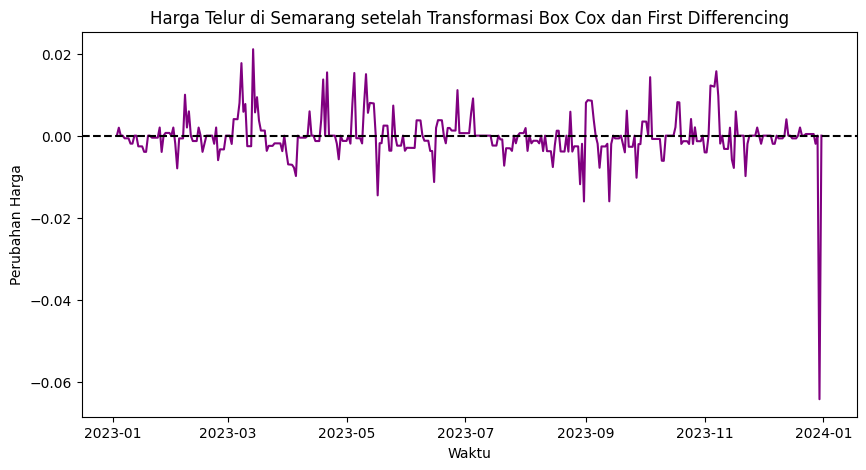

In [111]:
plt.figure(figsize=(10,5))
plt.plot(df['semarang_diff'], color='purple')
plt.title('Harga Telur di Semarang setelah Transformasi Box Cox dan First Differencing')
plt.xlabel('Waktu')
plt.ylabel('Perubahan Harga')
plt.axhline(y=0, color='black', linestyle='--')  # Garis nol
plt.show()

In [113]:
# Uji stasioneritas ragam sebelum dan sesudah differencing
levene_stat, levene_p = levene(df['semarang_glog'].dropna(), df['semarang_diff'].dropna())
bartlett_stat, bartlett_p = bartlett(df['semarang_glog'].dropna(), df['semarang_diff'].dropna())

print("Uji Varians Setelah GLOG + Differencing:")
print(f"Levene Test: Statistik={levene_stat:.4f}, p-value={levene_p:.4f}")
print(f"Bartlett Test: Statistik={bartlett_stat:.4f}, p-value={bartlett_p:.4f}")


Uji Varians Setelah GLOG + Differencing:
Levene Test: Statistik=579.4800, p-value=0.0000
Bartlett Test: Statistik=872.7456, p-value=0.0000


Dari hasil uji varians yang masih signifikan (p-value = 0.0000 pada Levene dan Bartlett test), dapat disimpulkan bahwa data belum stasioner terhadap ragam (variance stationarity) karena masih terdapat perbedaan varians antar kelompok.

# Kesimpulan 

Hasil analisis menunjukkan bahwa urutan preprocessing memengaruhi efektivitas transformasi dalam mencapai stasioneritas. Ketika berbagai transformasi seperti Box-Cox, Logaritmik, dan Yeo-Johnson diterapkan sebelum differencing, varians tetap tidak stasioner. Hal ini mengindikasikan bahwa variabilitas dalam data masih dipengaruhi oleh tren atau pola sistematis dalam rataan yang belum sepenuhnya terkoreksi oleh transformasi saja. Sebaliknya, ketika differencing dilakukan terlebih dahulu baru kemudian diikuti oleh transformasi Box-Cox, data menjadi stasioner baik terhadap rataan maupun ragam. Ini menunjukkan bahwa differencing lebih dulu dapat menghilangkan tren dalam rataan sehingga transformasi lebih efektif dalam menstabilkan varians.  

Kesimpulan utama dari temuan ini adalah bahwa dalam beberapa kasus, differencing sebelum transformasi dapat menjadi strategi yang lebih efektif untuk mencapai stasioneritas penuh, terutama jika tren dalam rataan menjadi penyebab utama ketidakstasioneran varians. Pendekatan ini dapat membantu dalam pemodelan deret waktu dengan memastikan bahwa data sudah memenuhi asumsi stasioneritas yang diperlukan untuk berbagai metode analisis, seperti ARIMA atau model berbasis regresi. Oleh karena itu, penting untuk melakukan eksplorasi awal terhadap sifat non-stasioneritas data sebelum menentukan urutan preprocessing yang optimal.

Namun, meskipun pendekatan differencing sebelum transformasi berhasil menstabilkan data, model regresi atau ARIMA biasa masih mengasumsikan bahwa varians residualnya konstan (homoskedastis). Jika terdapat indikasi bahwa varians masih berubah seiring waktu setelah preprocessing, maka model ARCH (Autoregressive Conditional Heteroskedasticity) atau GARCH (Generalized ARCH) dapat digunakan untuk menangani heteroskedastisitas dalam varians residual. Model ini secara khusus dirancang untuk menangkap pola volatilitas yang bergantung pada waktu, yang sering ditemukan dalam data keuangan, ekonomi, atau deret waktu lain dengan fluktuasi besar dalam variabilitasnya.

Dengan demikian, pemilihan strategi preprocessing harus disesuaikan dengan karakteristik data. Jika tren dalam rataan merupakan penyebab utama non-stasioneritas varians, maka pendekatan differencing sebelum transformasi dapat menjadi solusi yang lebih efektif. Namun, jika variabilitas data masih menunjukkan pola dinamis meskipun telah distabilkan, penggunaan model ARCH/GARCH dapat menjadi langkah lanjutan untuk menangkap perubahan varians secara lebih akurat. Oleh karena itu, analisis eksploratif sebelum pemodelan sangat penting agar pendekatan yang digunakan benar-benar sesuai dengan struktur data yang ada.

https://colab.research.google.com/drive/10qFuU4IpixxHu8xW7L6_kAEDUacna8od?usp=sharing#scrollTo=6xBUePGnV0w4